In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter # To adjust the ticks formatting
import warnings
warnings.filterwarnings('ignore') # To ignore warning messages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

In [2]:

# CSV dosyasını oku
df = pd.read_csv("Covid Data.csv")

# Veri çerçevesini incele
print(df.head())


   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO

In [3]:
(df.duplicated().sum()/df.shape[0])*100

77.44310135183463

In [4]:
df.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [5]:
# Check for missing values
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [6]:
df_null = df.copy()
for i in [97, 98, 99]:
   df_null.replace(i , np.nan, inplace = True)

In [7]:
df_null.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

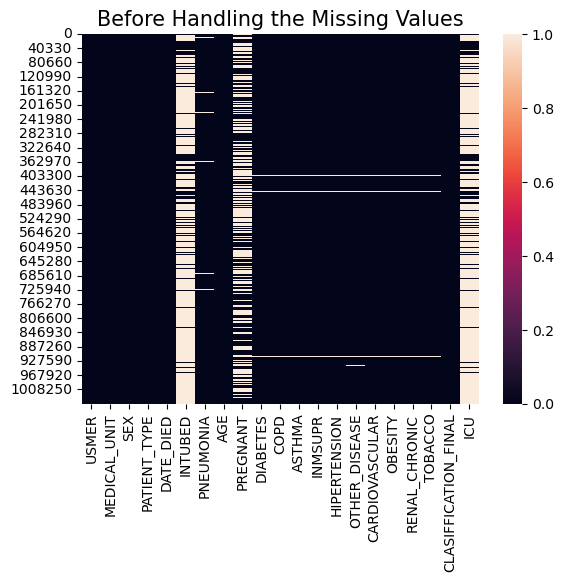

In [8]:
sns.heatmap(df_null.isnull())
plt.title('Before Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

In [9]:
# Check for any strings in the feature "DATE_DIED"
df['DATE_DIED'][df['DATE_DIED'].apply(lambda x: isinstance(x, str))]

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570    9999-99-99
1048571    9999-99-99
1048572    9999-99-99
1048573    9999-99-99
1048574    9999-99-99
Name: DATE_DIED, Length: 1048575, dtype: object

In [10]:
df['DEAD'] = [0 if i=='9999-99-99' else 1 for i in df.DATE_DIED]

In [11]:
df['DEAD'].value_counts()

DEAD
0    971633
1     76942
Name: count, dtype: int64

In [12]:
df['DATE_DIED'].replace('9999-99-99', np.nan, inplace = True)

In [13]:
df['DATE_DIED']

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570           NaN
1048571           NaN
1048572           NaN
1048573           NaN
1048574           NaN
Name: DATE_DIED, Length: 1048575, dtype: object

In [14]:
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], format='%d/%m/%Y')


In [15]:
df['DATE_DIED']

0         2020-05-03
1         2020-06-03
2         2020-06-09
3         2020-06-12
4         2020-06-21
             ...    
1048570          NaT
1048571          NaT
1048572          NaT
1048573          NaT
1048574          NaT
Name: DATE_DIED, Length: 1048575, dtype: datetime64[ns]

In [16]:
df['DATE_DIED'].isnull().sum()

971633

In [17]:
df.describe().round(3).T.drop('count', axis = 1)

,mean,min,25%,50%,75%,max,std
USMER,1.632,1.0,1.0,2.0,2.0,2.0,0.482
MEDICAL_UNIT,8.981,1.0,4.0,12.0,12.0,13.0,3.723
SEX,1.499,1.0,1.0,1.0,2.0,2.0,0.5
PATIENT_TYPE,1.191,1.0,1.0,1.0,1.0,2.0,0.393
DATE_DIED,2020-06-09 16:17:04.480777728,2020-01-02 00:00:00,2020-05-18 00:00:00,2020-06-11 00:00:00,2020-07-04 00:00:00,2021-05-02 00:00:00,NaN
INTUBED,79.523,1.0,97.0,97.0,97.0,99.0,36.869
PNEUMONIA,3.347,1.0,2.0,2.0,2.0,99.0,11.913
AGE,41.794,0.0,30.0,40.0,53.0,121.0,16.907
PREGNANT,49.766,1.0,2.0,97.0,97.0,98.0,47.511
DIABETES,2.186,1.0,2.0,2.0,2.0,98.0,5.424


In [18]:
df['AGE'][df['AGE'] > 110].value_counts().sum()

22

In [19]:
df.SEX.value_counts()

SEX
1    525064
2    523511
Name: count, dtype: int64

In [20]:
df.SEX.shape

(1048575,)

In [21]:
df[(df['SEX'] == 1)].shape

(525064, 22)

In [22]:
df[(df['SEX'] == 2)].shape

(523511, 22)

In [23]:
df[(df['SEX'] == 1)]['PREGNANT'] # Females corresponding values in 'PREGNANT' feature

0          2
3          2
5          2
6          2
7          2
          ..
1048563    2
1048564    2
1048565    2
1048567    2
1048569    2
Name: PREGNANT, Length: 525064, dtype: int64

In [24]:
df[(df['SEX'] == 1)]['PREGNANT'].value_counts()

PREGNANT
2     513179
1       8131
98      3754
Name: count, dtype: int64

In [25]:
513179+8131+3754

525064

In [26]:
df[(df['SEX'] == 2)]['PREGNANT'] # Males corresponding values in 'PREGNANT' feature

1          97
2          97
4          97
11         97
12         97
           ..
1048570    97
1048571    97
1048572    97
1048573    97
1048574    97
Name: PREGNANT, Length: 523511, dtype: int64

In [27]:
df[(df['SEX'] == 2) & (df['PREGNANT'])]['PREGNANT'].value_counts()

PREGNANT
97    523511
Name: count, dtype: int64

In [28]:
df['PREGNANT'].value_counts()

PREGNANT
97    523511
2     513179
1       8131
98      3754
Name: count, dtype: int64

In [29]:
df['PREGNANT'].replace (97, 2, inplace = True)

In [30]:
df['PREGNANT'].value_counts()

PREGNANT
2     1036690
1        8131
98       3754
Name: count, dtype: int64

In [31]:
df.ICU.value_counts()

ICU
97    848544
2     175685
1      16858
99      7488
Name: count, dtype: int64

In [32]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at ICU = {i} the shape will be:", "\n")
        print (df[(df['PATIENT_TYPE'] == j) & (df['ICU'] == i)].shape, "\n",
               "--------------------------------------------------------------------------------", "\n\n")

At PATIENT_TYPE = 1 and at ICU = 1 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 1 the shape will be: 

(16858, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 2 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 2 the shape will be: 

(175685, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 97 the shape will be: 

(848544, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 97 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 99 the shape will be: 

(0, 22) 
 -----------------

In [33]:
df['ICU'].replace (97, 2, inplace = True)

In [34]:
df.ICU.value_counts()

ICU
2     1024229
1       16858
99       7488
Name: count, dtype: int64

In [35]:
df.INTUBED.value_counts()

INTUBED
97    848544
2     159050
1      33656
99      7325
Name: count, dtype: int64

In [36]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at INTUBED = {i} the shape will be:", "\n")
        print (df[(df['PATIENT_TYPE'] == j) & (df['INTUBED'] == i)].shape, "\n",
               "--------------------------------------------------------------------------------", "\n\n")

At PATIENT_TYPE = 1 and at INTUBED = 1 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at INTUBED = 1 the shape will be: 

(33656, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at INTUBED = 2 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at INTUBED = 2 the shape will be: 

(159050, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at INTUBED = 97 the shape will be: 

(848544, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at INTUBED = 97 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at INTUBED = 99 the shape will be: 


In [37]:
df['INTUBED'].replace (97, 2, inplace = True)

In [38]:
df.INTUBED.value_counts()

INTUBED
2     1007594
1       33656
99       7325
Name: count, dtype: int64

In [39]:
for i in [98, 99]:
   df.replace(i , np.nan, inplace = True)

In [40]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,2020-05-03,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1,2,1,2,1,2020-06-03,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1
2,2,1,2,2,2020-06-09,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,2020-06-12,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
4,2,1,2,1,2020-06-21,2.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,2.0,2.0,40.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048571,1,13,2,2,NaT,2.0,2.0,51.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048572,2,13,2,1,NaT,2.0,2.0,55.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048573,2,13,2,1,NaT,2.0,2.0,28.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0


In [41]:
df_null2 = df.copy()
df_null2.DATE_DIED = df_null2.DATE_DIED.fillna("9999-99-99")

In [42]:
df_null2.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
DATE_DIED                   0
INTUBED                  7325
PNEUMONIA               16003
AGE                       210
PREGNANT                 3754
DIABETES                 3338
COPD                     3003
ASTHMA                   2979
INMSUPR                  3404
HIPERTENSION             3104
OTHER_DISEASE            5045
CARDIOVASCULAR           3076
OBESITY                  3032
RENAL_CHRONIC            3006
TOBACCO                  3220
CLASIFFICATION_FINAL        0
ICU                      7488
DEAD                        0
dtype: int64

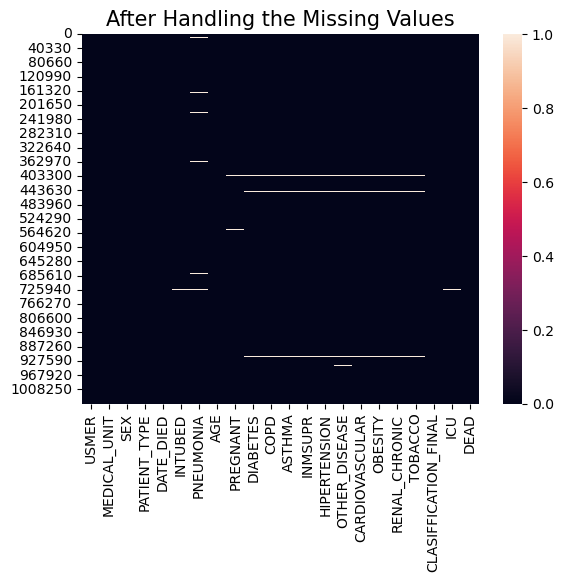

In [43]:
sns.heatmap(df_null2.isnull())
plt.title('After Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

In [44]:
df.describe().round(3).T.drop('count', axis = 1)

,mean,min,25%,50%,75%,max,std
USMER,1.632,1.0,1.0,2.0,2.0,2.0,0.482
MEDICAL_UNIT,8.981,1.0,4.0,12.0,12.0,13.0,3.723
SEX,1.499,1.0,1.0,1.0,2.0,2.0,0.5
PATIENT_TYPE,1.191,1.0,1.0,1.0,1.0,2.0,0.393
DATE_DIED,2020-06-09 16:17:04.480777728,2020-01-02 00:00:00,2020-05-18 00:00:00,2020-06-11 00:00:00,2020-07-04 00:00:00,2021-05-02 00:00:00,NaN
INTUBED,1.968,1.0,2.0,2.0,2.0,2.0,0.177
PNEUMONIA,1.864,1.0,2.0,2.0,2.0,2.0,0.342
AGE,41.783,0.0,30.0,40.0,53.0,121.0,16.89
PREGNANT,1.992,1.0,2.0,2.0,2.0,2.0,0.088
DIABETES,1.88,1.0,2.0,2.0,2.0,2.0,0.324


In [45]:
for i in df.columns:
    if(i!='AGE' and i!='DATE_DIED'):
        print(i," -> ", dict(df[i].value_counts()))

USMER  ->  {2: 662903, 1: 385672}
MEDICAL_UNIT  ->  {12: 602995, 4: 314405, 6: 40584, 9: 38116, 3: 19175, 8: 10399, 10: 7873, 5: 7244, 11: 5577, 13: 996, 7: 891, 2: 169, 1: 151}
SEX  ->  {1: 525064, 2: 523511}
PATIENT_TYPE  ->  {1: 848544, 2: 200031}
INTUBED  ->  {2.0: 1007594, 1.0: 33656}
PNEUMONIA  ->  {2.0: 892534, 1.0: 140038}
PREGNANT  ->  {2.0: 1036690, 1.0: 8131}
DIABETES  ->  {2.0: 920248, 1.0: 124989}
COPD  ->  {2.0: 1030510, 1.0: 15062}
ASTHMA  ->  {2.0: 1014024, 1.0: 31572}
INMSUPR  ->  {2.0: 1031001, 1.0: 14170}
HIPERTENSION  ->  {2.0: 882742, 1.0: 162729}
OTHER_DISEASE  ->  {2.0: 1015490, 1.0: 28040}
CARDIOVASCULAR  ->  {2.0: 1024730, 1.0: 20769}
OBESITY  ->  {2.0: 885727, 1.0: 159816}
RENAL_CHRONIC  ->  {2.0: 1026665, 1.0: 18904}
TOBACCO  ->  {2.0: 960979, 1.0: 84376}
CLASIFFICATION_FINAL  ->  {7: 499250, 3: 381527, 6: 128133, 5: 26091, 1: 8601, 4: 3122, 2: 1851}
ICU  ->  {2.0: 1024229, 1.0: 16858}
DEAD  ->  {0: 971633, 1: 76942}


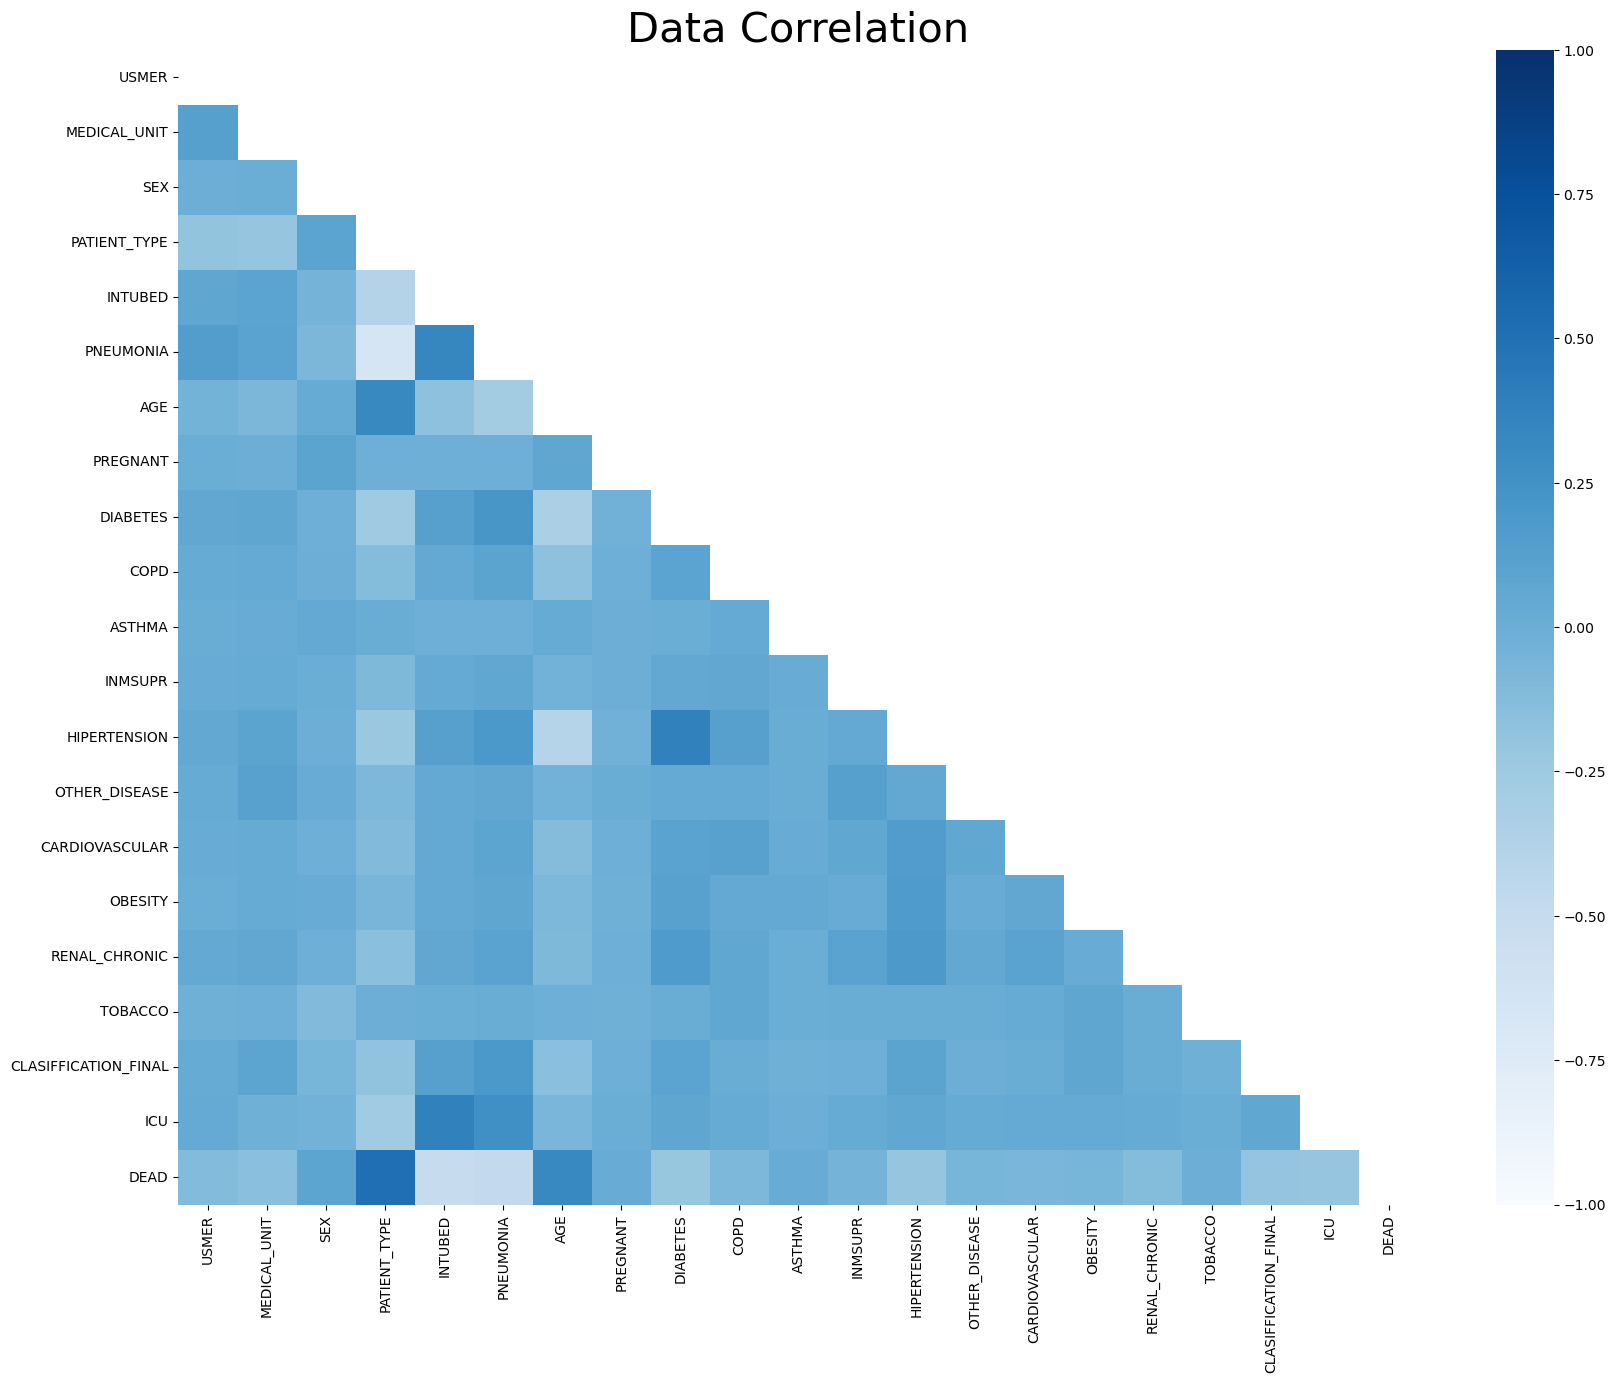

In [46]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(df.drop(columns=['DATE_DIED']).corr()))
sns.heatmap(df.drop(columns=['DATE_DIED']).corr(), mask = mask, annot = True, cmap = "Blues", vmin = -1, vmax = 1)
plt.title('Data Correlation', color = 'black', fontsize = 30)
plt.show()

In [47]:
# Let's first create a new DataFrame for medical conditions only:
df_med = df.drop(columns=['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
                          'INTUBED', 'AGE', 'CLASIFFICATION_FINAL', 'ICU'], axis=1)
df_med

,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DEAD
0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1
2,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048571,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0
1048572,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048573,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0


In [48]:
df_med.duplicated(keep = False).sum()

1046563

In [49]:
dict(df['DEAD'].value_counts())[1]

76942

Text(0, 0.5, 'Count')

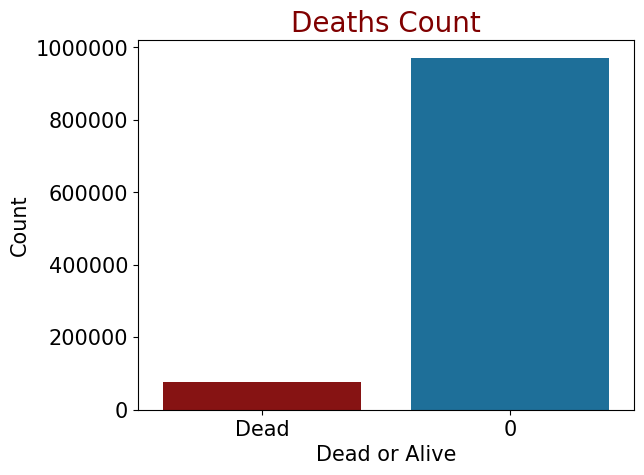

In [50]:
D = df['DEAD']
D = D.replace(1, "Dead")
D = D.replace(2, "Alive")
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Deaths Count', color = '#800000', fontsize = 20)
sns.countplot(x=D, palette = ['#990000',"#0a75ad"])
plt.xlabel("Dead or Alive", fontsize=15)
plt.ylabel("Count", fontsize=15)

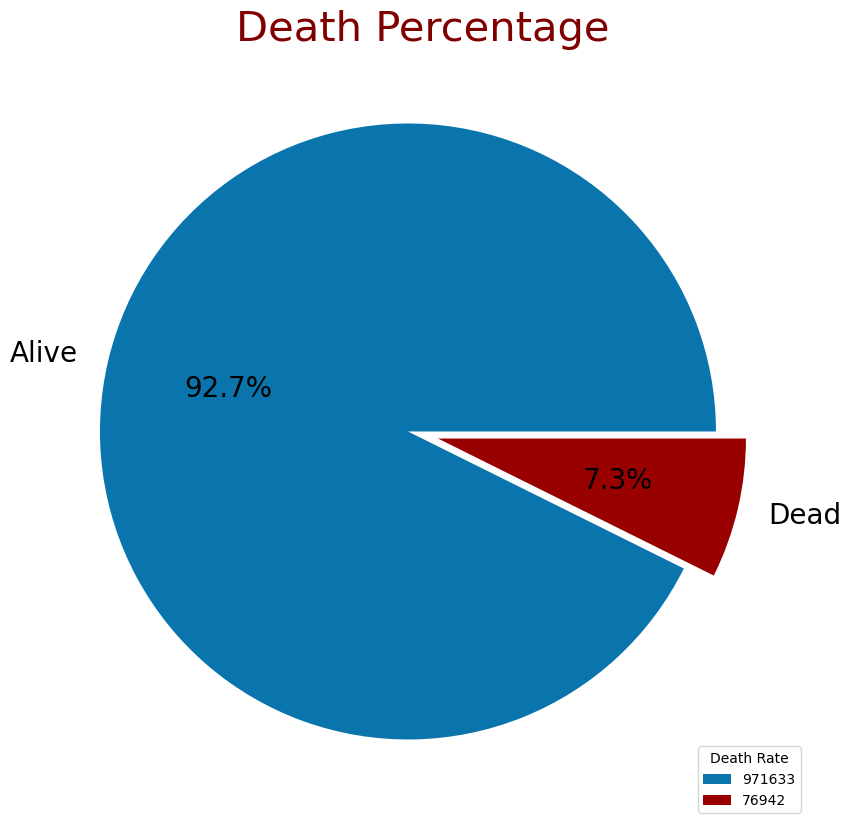

In [51]:
labels = ["Alive", "Dead"]
sizes = df['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage',color = '#800000',fontsize = 30)
plt.legend(df['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()


In [52]:
df_dead = df[df["DEAD"] == 1]
df_dead

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,2020-05-03,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1,2,1,2,1,2020-06-03,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1
2,2,1,2,2,2020-06-09,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,2020-06-12,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
4,2,1,2,1,2020-06-21,2.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,2,2,2020-07-18,1.0,1.0,73.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1
1047636,1,13,2,1,2020-07-26,2.0,1.0,82.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1047637,1,13,1,1,2020-07-27,2.0,1.0,82.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1047638,1,13,2,2,2020-07-29,1.0,1.0,80.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1


In [53]:
df_dead["CLASIFFICATION_FINAL"].value_counts()


CLASIFFICATION_FINAL
3    51430
7    13695
6     7652
2     1851
5     1211
1      955
4      148
Name: count, dtype: int64

In [54]:
def Covid_or_Not(val):
    if val >= 4:
        return "Not a Covid 19 Carrier"
    else:
        return "A Covid 19 Carrier"

In [55]:
df_dead['Covid_or_Not'] = df_dead["CLASIFFICATION_FINAL"].apply(Covid_or_Not)


In [56]:
df_dead


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_or_Not
0,2,1,1,1,2020-05-03,2.0,1.0,65.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
1,2,1,2,1,2020-06-03,2.0,1.0,72.0,2.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1,Not a Covid 19 Carrier
2,2,1,2,2,2020-06-09,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
3,2,1,1,1,2020-06-12,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1,Not a Covid 19 Carrier
4,2,1,2,1,2020-06-21,2.0,2.0,68.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,2,2,2020-07-18,1.0,1.0,73.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
1047636,1,13,2,1,2020-07-26,2.0,1.0,82.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
1047637,1,13,1,1,2020-07-27,2.0,1.0,82.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
1047638,1,13,2,2,2020-07-29,1.0,1.0,80.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier


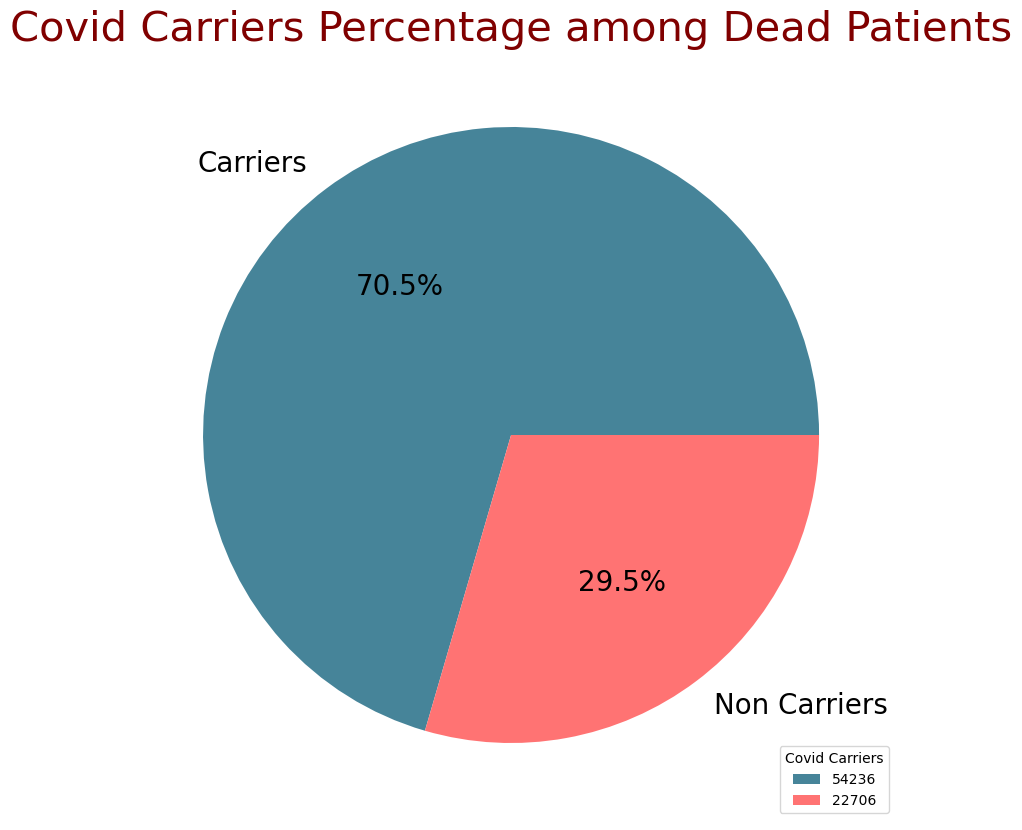

In [57]:
labels = ["Carriers", "Non Carriers"]
sizes = df_dead['Covid_or_Not'].value_counts()
colors = ['#468499', '#ff7373']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage among Dead Patients', color = 'Maroon', fontsize = 30)
plt.legend(df_dead['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()

In [58]:
df_dead["Covid_or_Not"].value_counts()

Covid_or_Not
A Covid 19 Carrier        54236
Not a Covid 19 Carrier    22706
Name: count, dtype: int64

In [59]:
df['Covid_or_Not'] = df["CLASIFFICATION_FINAL"].apply(Covid_or_Not)

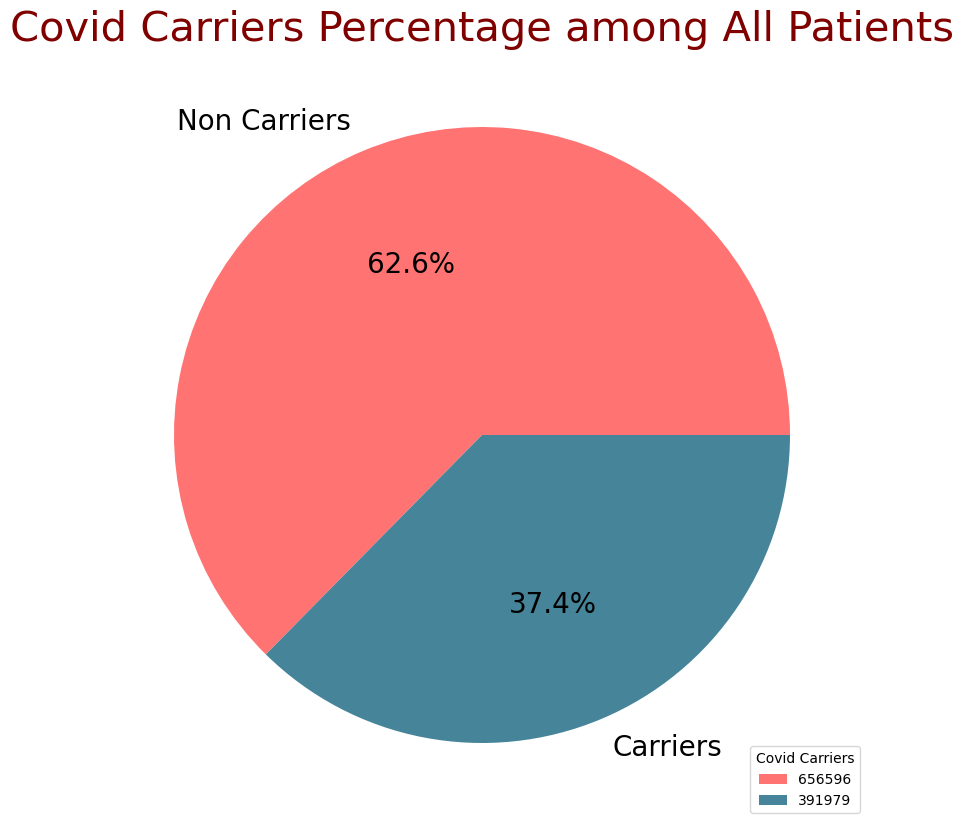

In [60]:
labels = ["Non Carriers", "Carriers"]
sizes = df['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage among All Patients', color = 'Maroon', fontsize = 30)
plt.legend(df['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()

In [61]:
df["Covid_or_Not"].value_counts()

Covid_or_Not
Not a Covid 19 Carrier    656596
A Covid 19 Carrier        391979
Name: count, dtype: int64

In [62]:
Covid_deaths = df[(df['Covid_or_Not'] == "A Covid 19 Carrier")]

In [63]:
Covid_deaths["DEAD"].value_counts()

DEAD
0    337743
1     54236
Name: count, dtype: int64

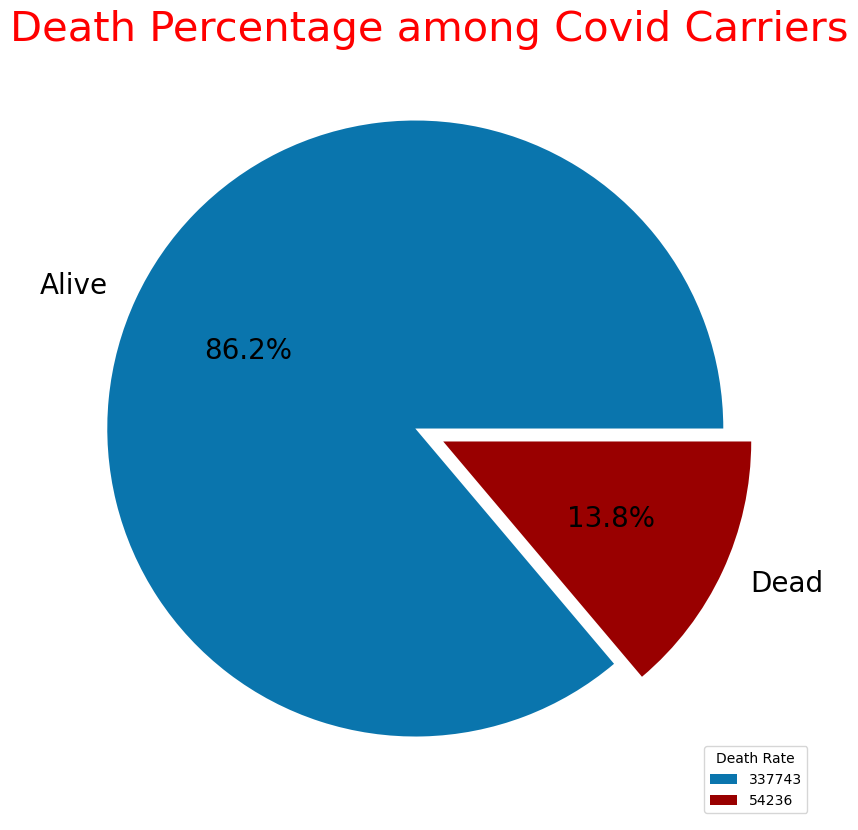

In [64]:
labels = ["Alive", "Dead"]
sizes = Covid_deaths['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage among Covid Carriers',color = 'red',fontsize = 30)
plt.legend(Covid_deaths['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

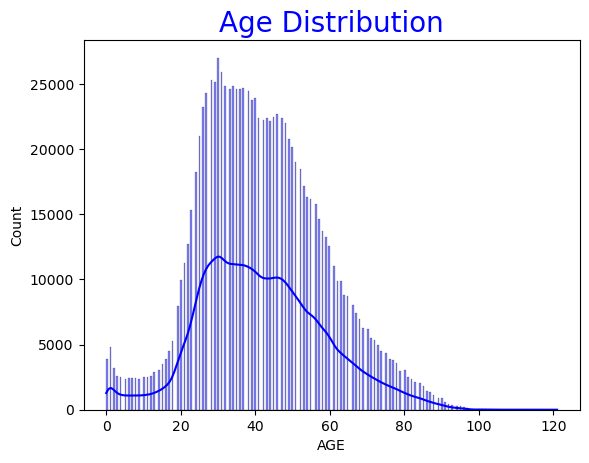

In [65]:
sns.histplot(x=df.AGE, kde = True, color = "blue")
plt.title('Age Distribution', color = 'blue', fontsize = 20)
plt.show()

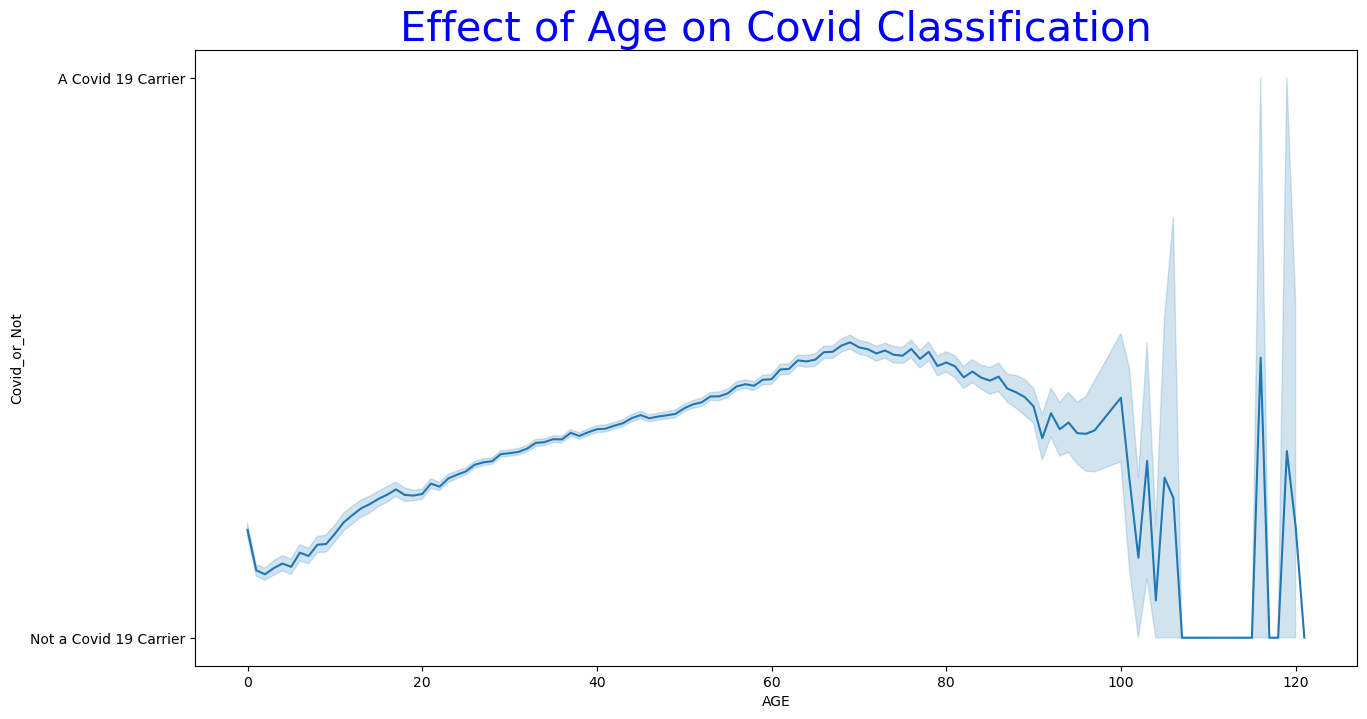

In [66]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x="AGE", y="Covid_or_Not")
plt.title('Effect of Age on Covid Classification', color = 'blue', fontsize = 30)
plt.show()

In [67]:
df_mod = df.copy()

In [68]:
df_mod['OBESITY'] = ["Obese" if i==1 else "Not Obese" for i in df.OBESITY]

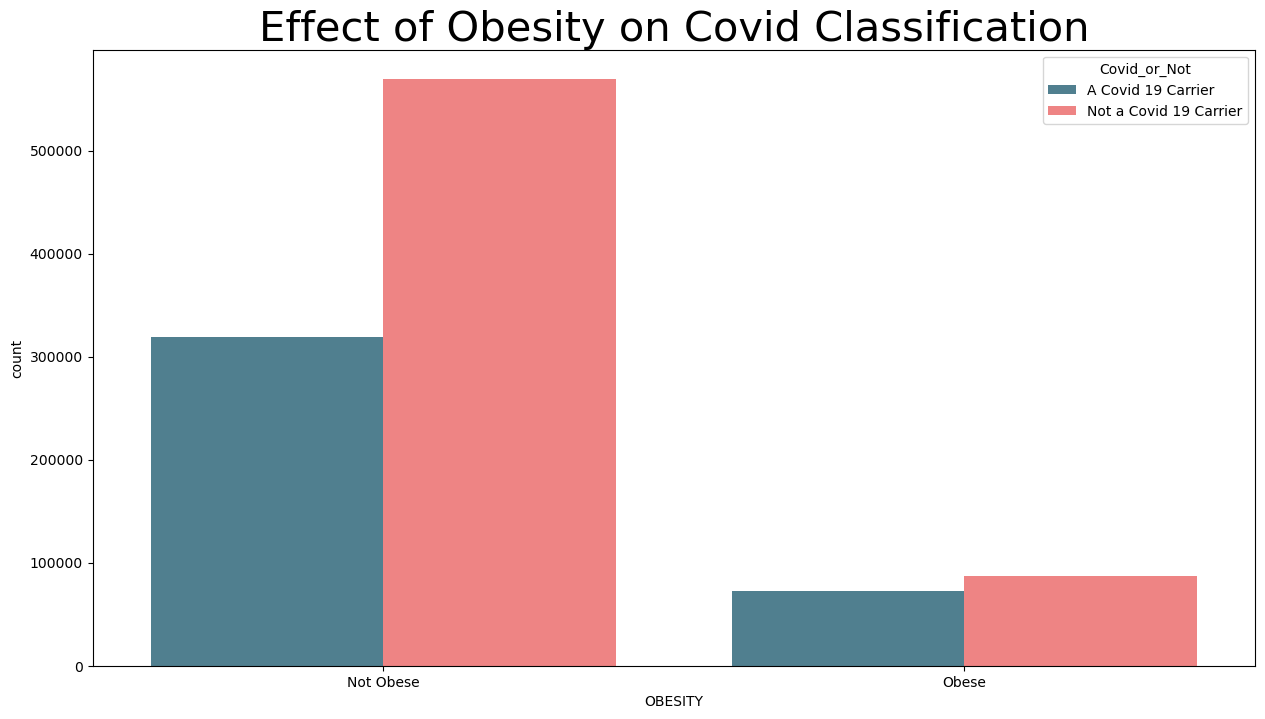

In [69]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_mod, x="OBESITY", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Obesity on Covid Classification', color = 'black', fontsize = 30)
plt.show()

In [70]:
df_mod['SEX'] = ["Female" if i==1 else "Male" for i in df.SEX]

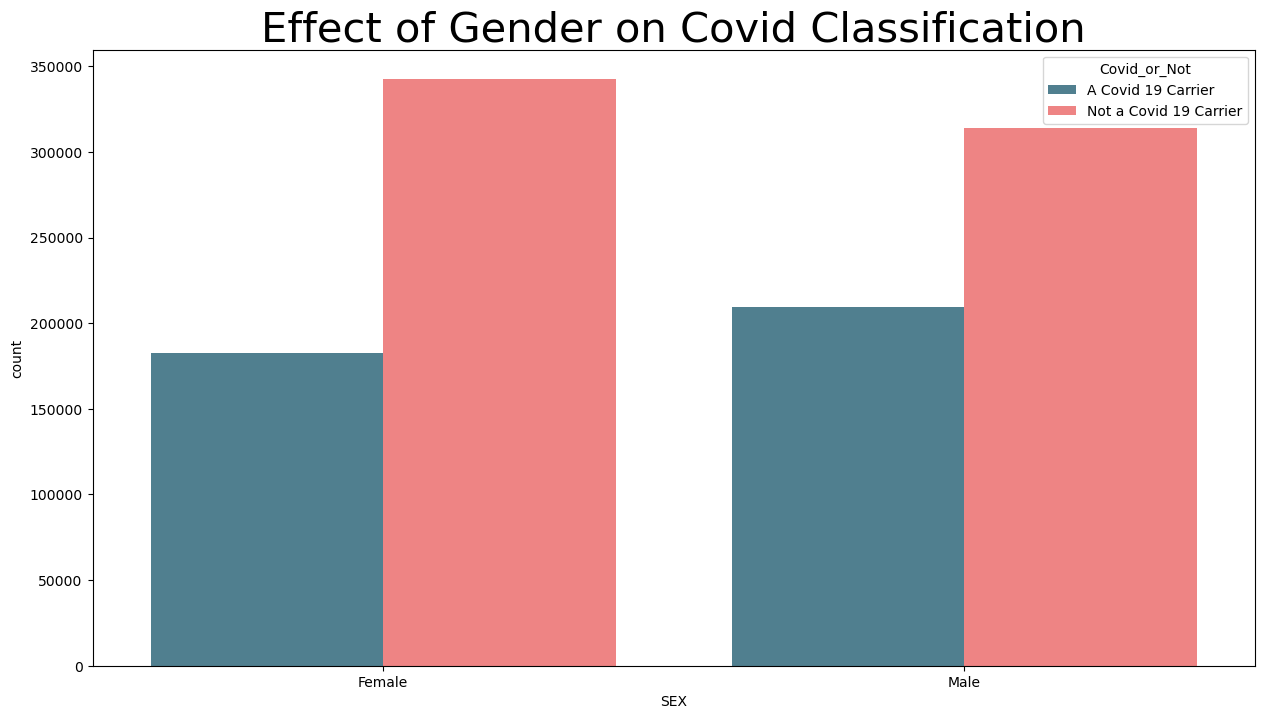

In [71]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_mod, x="SEX", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Gender on Covid Classification', color = 'black', fontsize = 30)
plt.show()

In [72]:
df_preg = df[df["SEX"] == 1]
df_preg["PREGNANT"].value_counts()

PREGNANT
2.0    513179
1.0      8131
Name: count, dtype: int64

In [73]:
df_preg['PREGNANT'] = ["Pregnant" if i==1 else "Non Pregnant" for i in df_preg.PREGNANT]

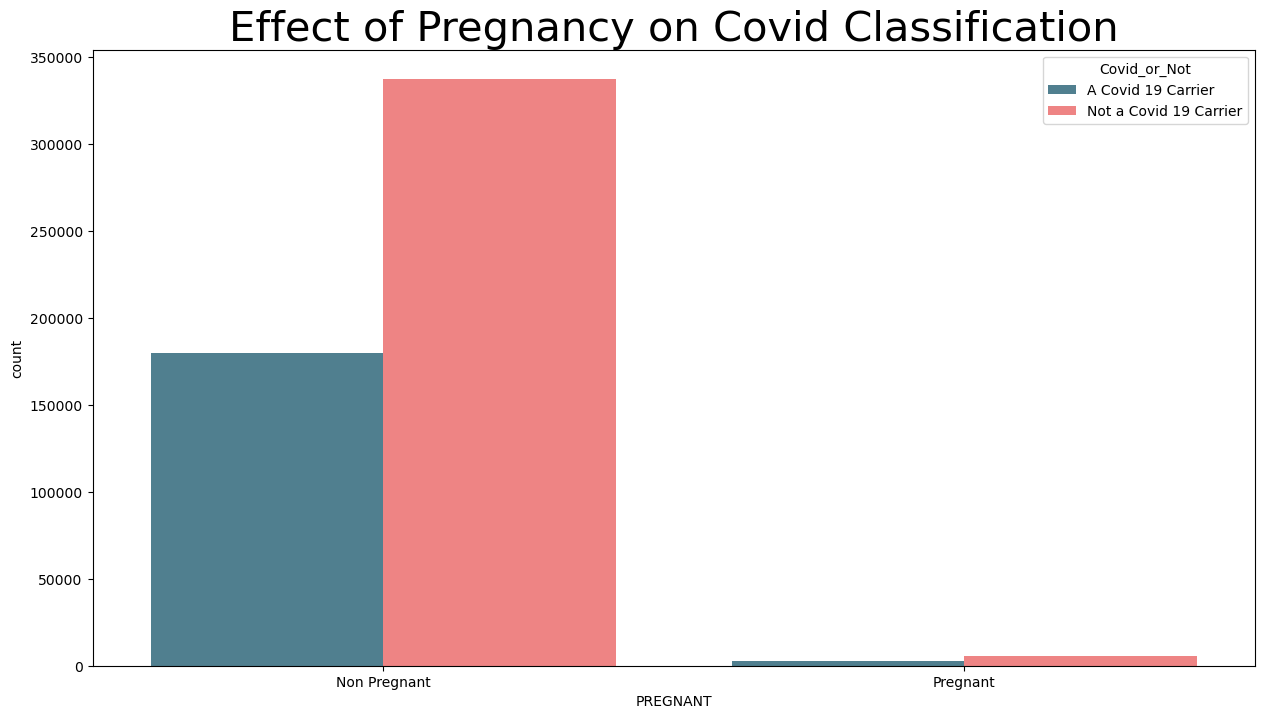

In [74]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_preg, x="PREGNANT", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Pregnancy on Covid Classification', color = 'black', fontsize = 30)
plt.show()

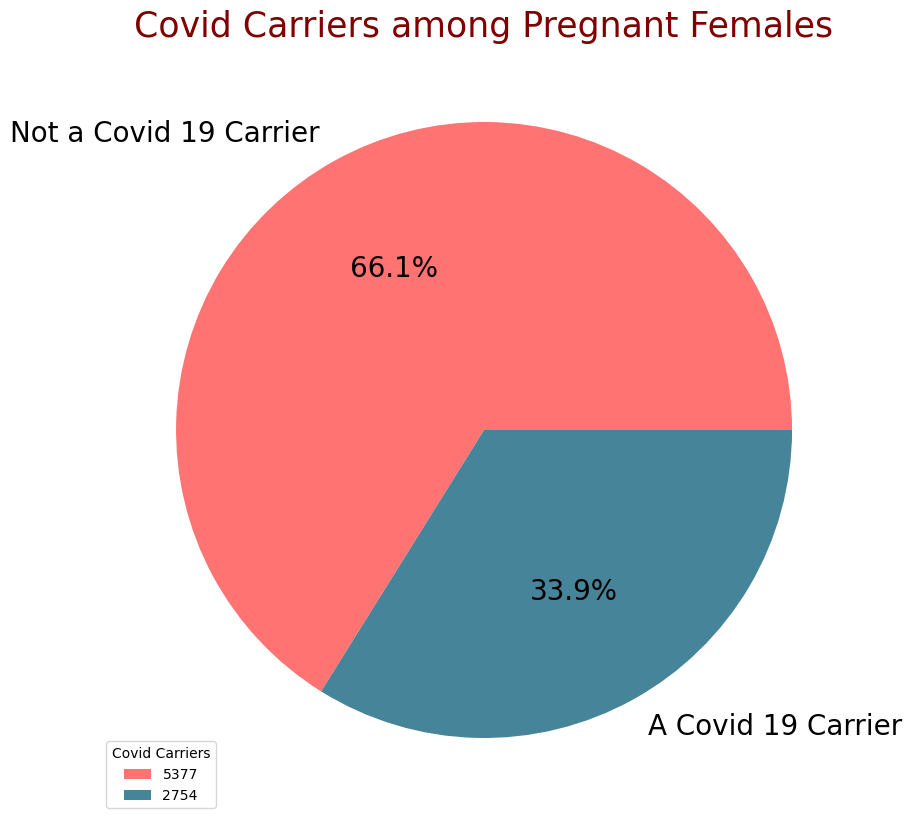

In [75]:
labels = ["Not a Covid 19 Carrier", "A Covid 19 Carrier"]
sizes = df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among Pregnant Females', color = 'maroon', fontsize = 25)
plt.show()

In [76]:
df_preg[(df_preg['PREGNANT'] == "Non Pregnant")]['Covid_or_Not'].value_counts()

Covid_or_Not
Not a Covid 19 Carrier    337197
A Covid 19 Carrier        179736
Name: count, dtype: int64

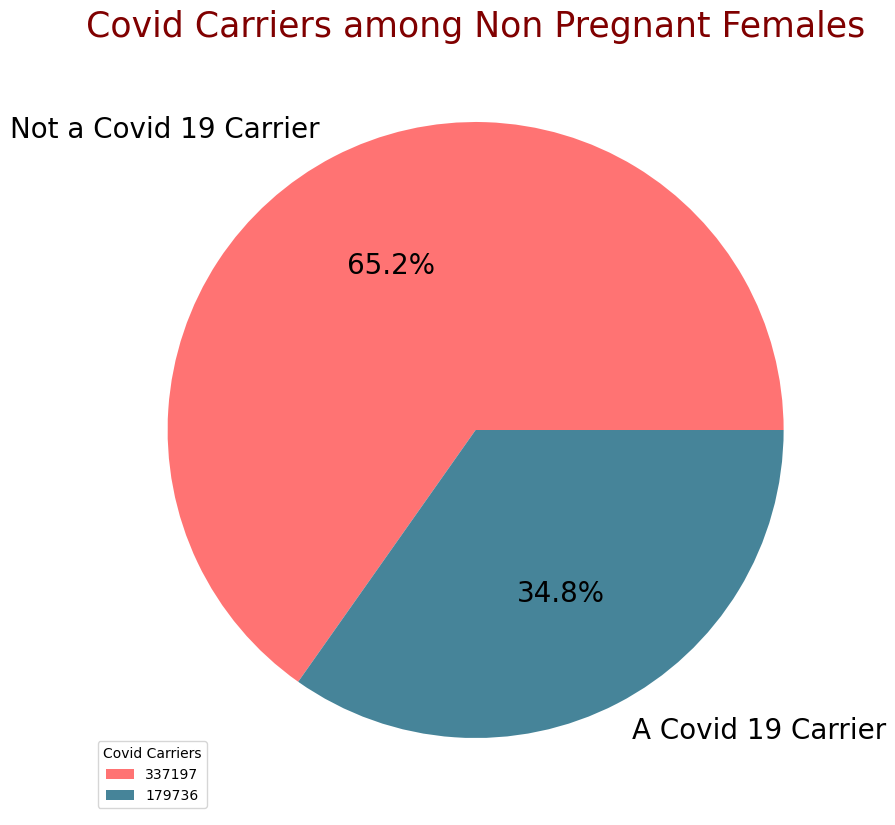

In [77]:
labels = ["Not a Covid 19 Carrier", "A Covid 19 Carrier"]
sizes = df_preg[(df_preg['PREGNANT'] == 'Non Pregnant')]['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df_preg[(df_preg['PREGNANT'] == "Non Pregnant")]['Covid_or_Not'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among Non Pregnant Females', color = 'maroon', fontsize = 25)
plt.show()

In [78]:
df_med

,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DEAD
0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1
2,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048571,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0
1048572,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048573,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0


In [79]:
df_diseases = df_med.drop(columns = ["PREGNANT", "OBESITY", 'DEAD'])

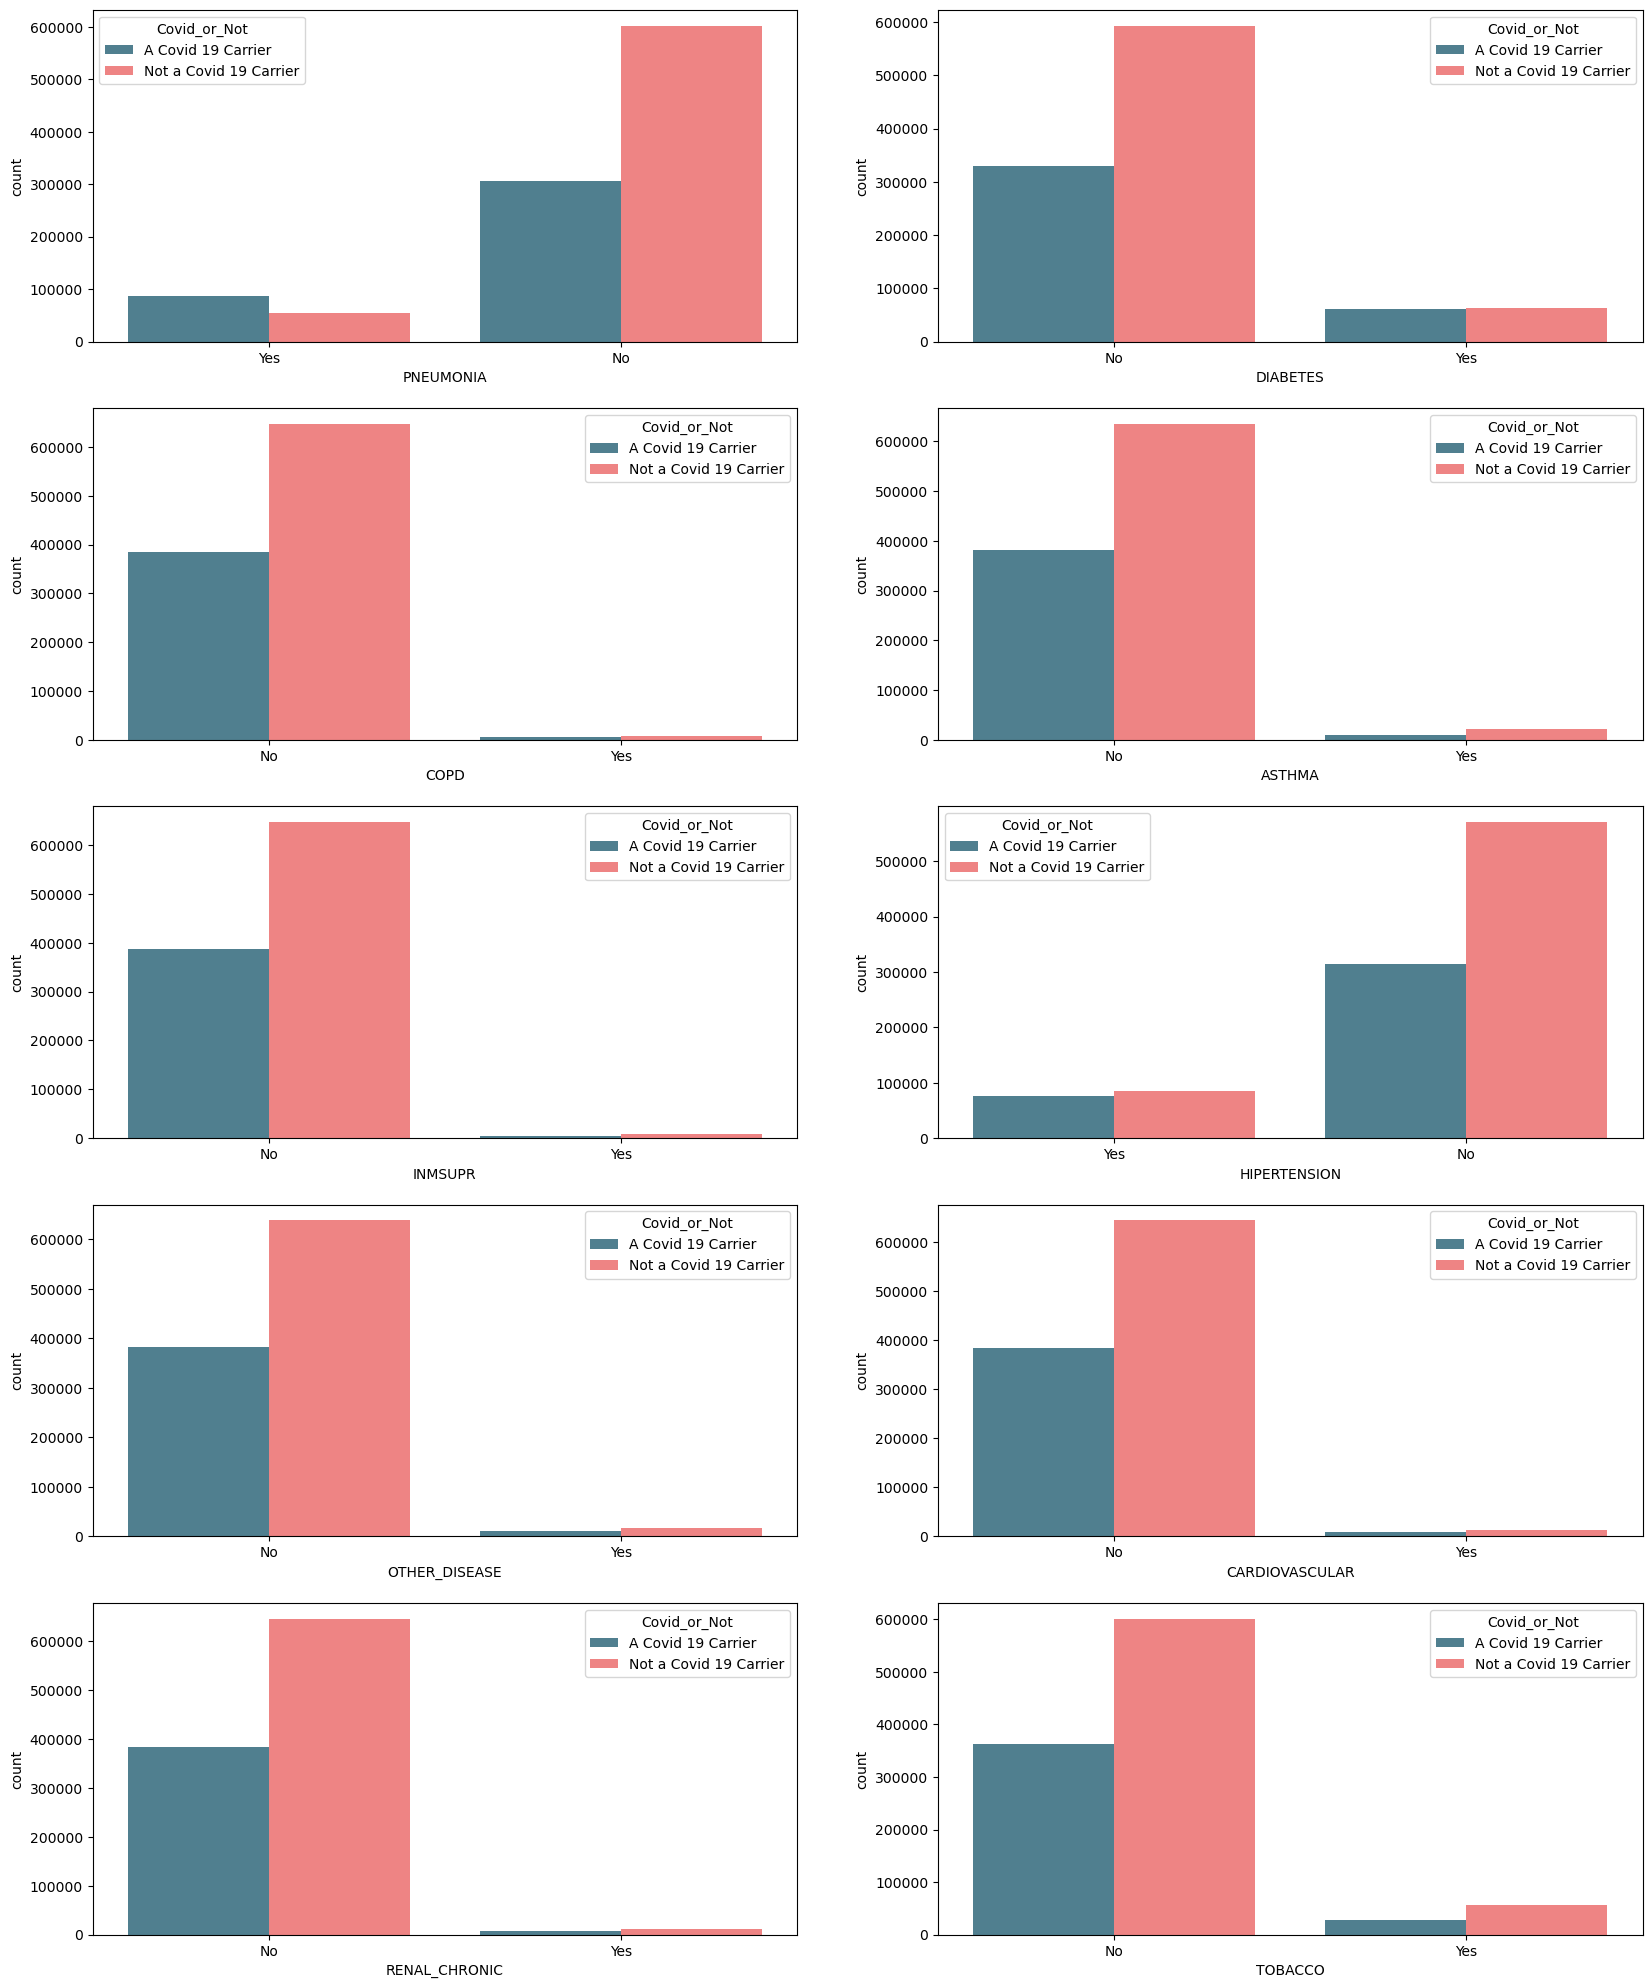

In [80]:
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases.columns:
    plt.subplot(5, 2, index)
    df_diseases[i] = ["Yes" if j==1 else "No" for j in df_diseases[i]]
    sns.countplot(data=df_diseases, x=i, hue=df["Covid_or_Not"], palette = ['#468499', '#ff7373'])
    index += 1
plt.show()

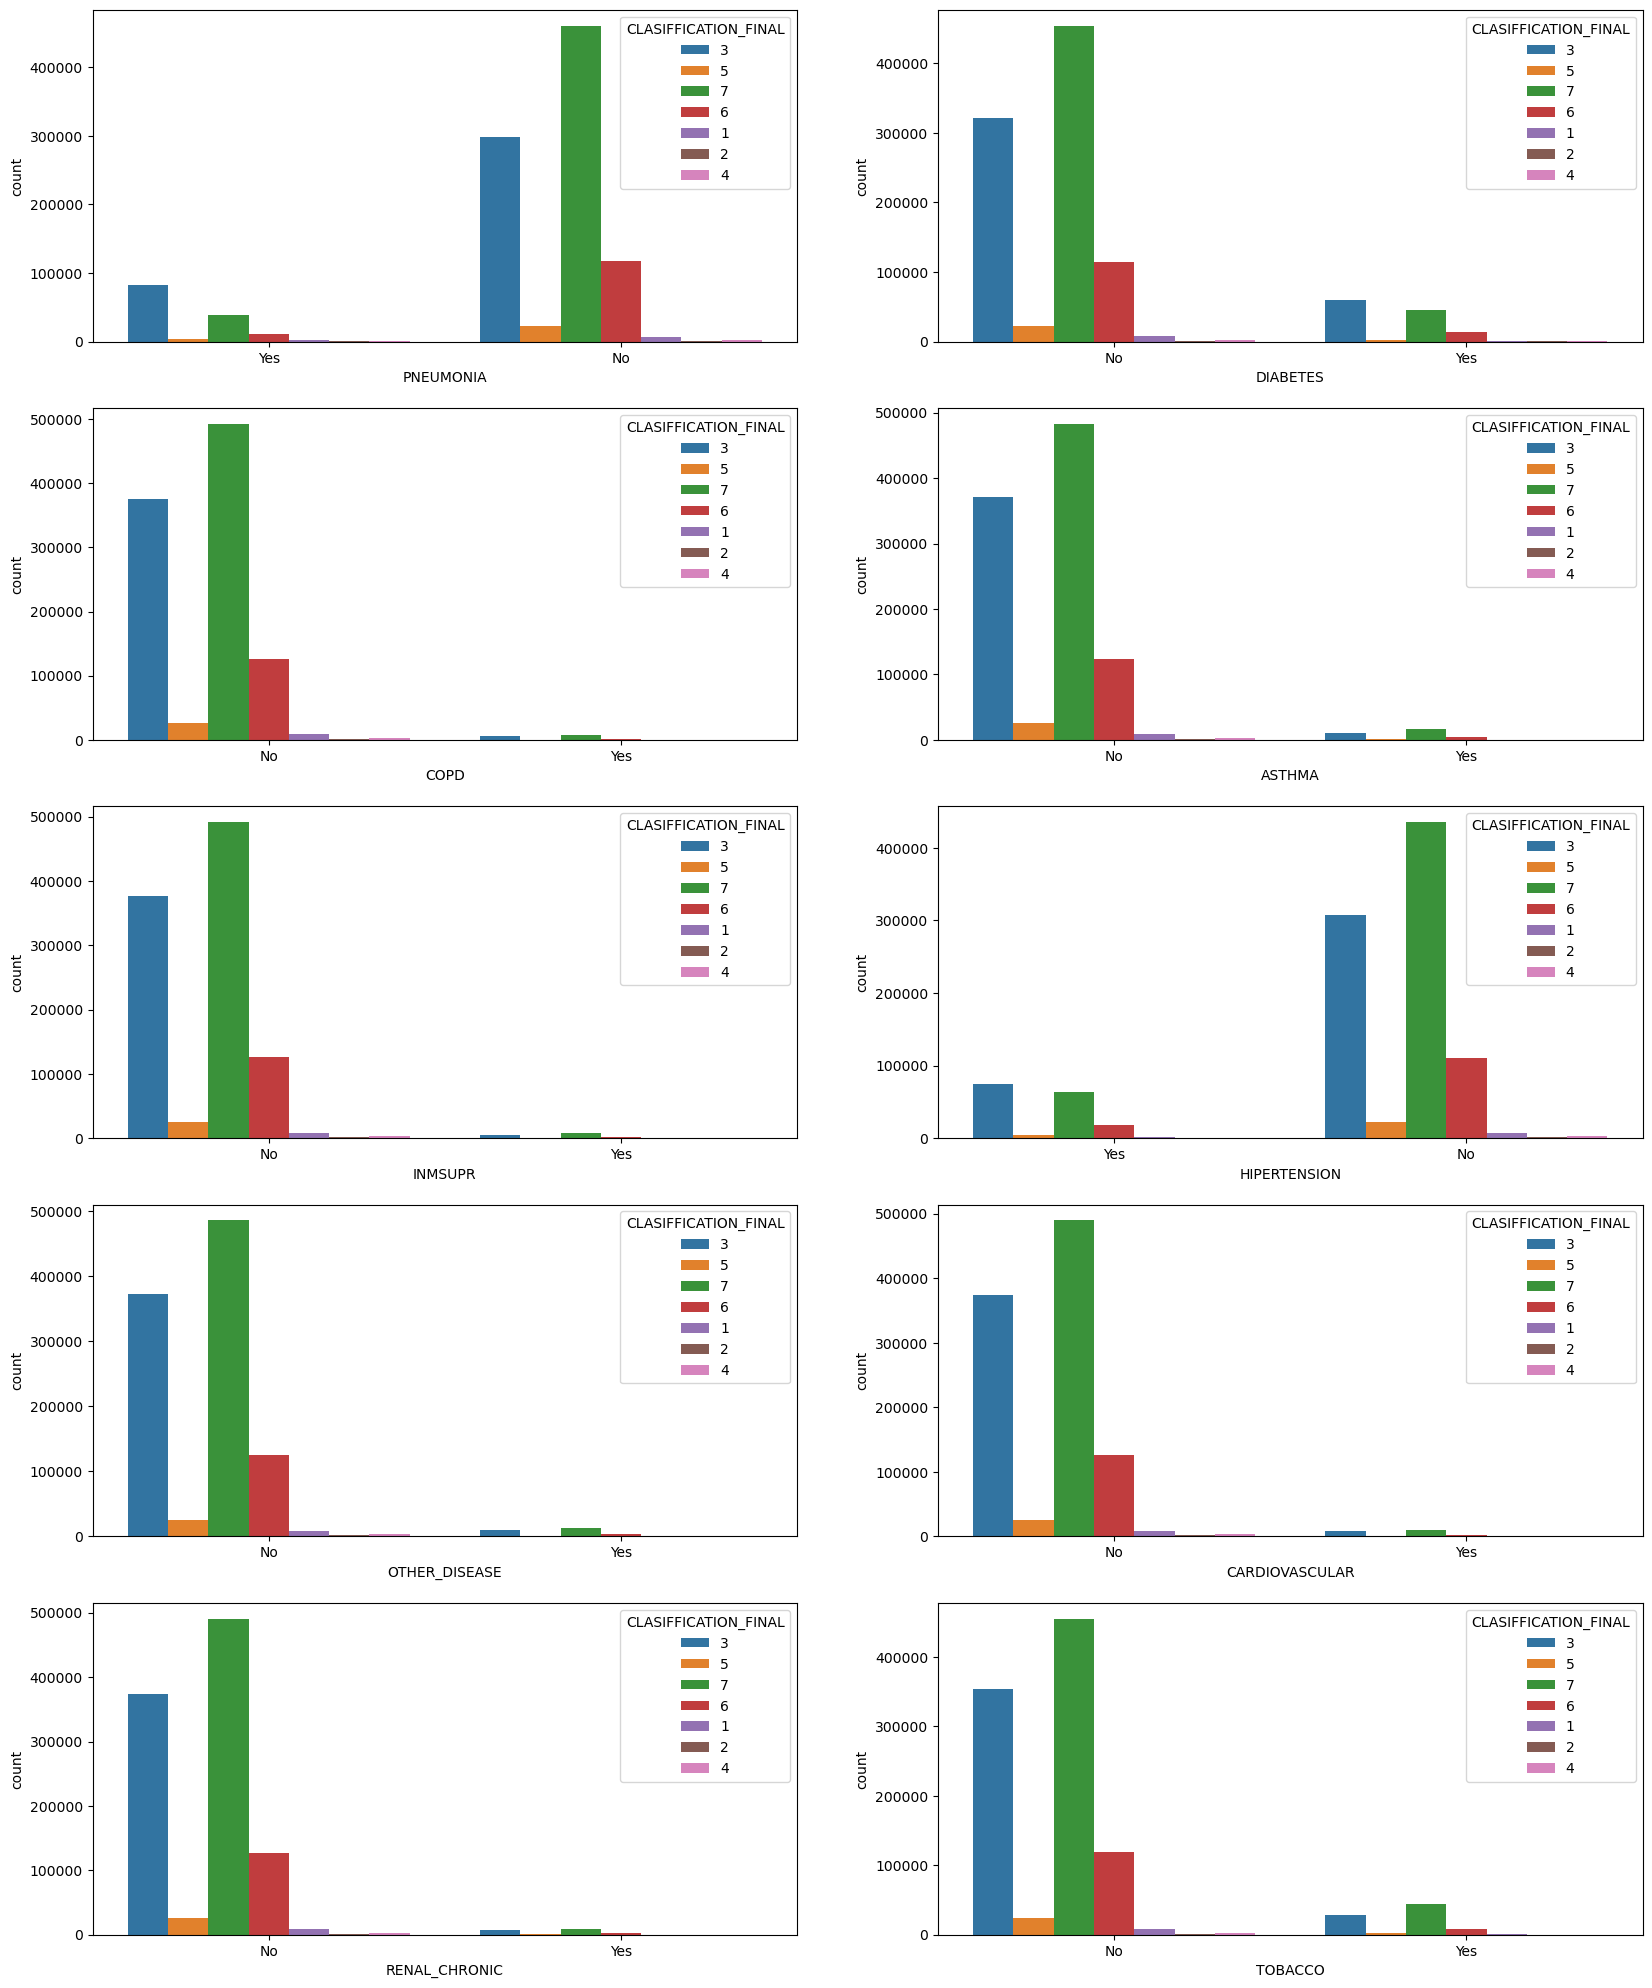

In [81]:
df['CLASIFFICATION_FINAL'] = df['CLASIFFICATION_FINAL'].astype(str)

# Görselleştirmeyi oluştur
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases.columns:
    plt.subplot(5, 2, index)
    sns.countplot(data=df_diseases, x=i, hue=df['CLASIFFICATION_FINAL'])
    index += 1

# Görselleştirmeyi göster
plt.show()


In [82]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD',
       'Covid_or_Not'],
      dtype='object')

In [83]:
df['PATIENT_TYPE'].value_counts()

PATIENT_TYPE
1    848544
2    200031
Name: count, dtype: int64

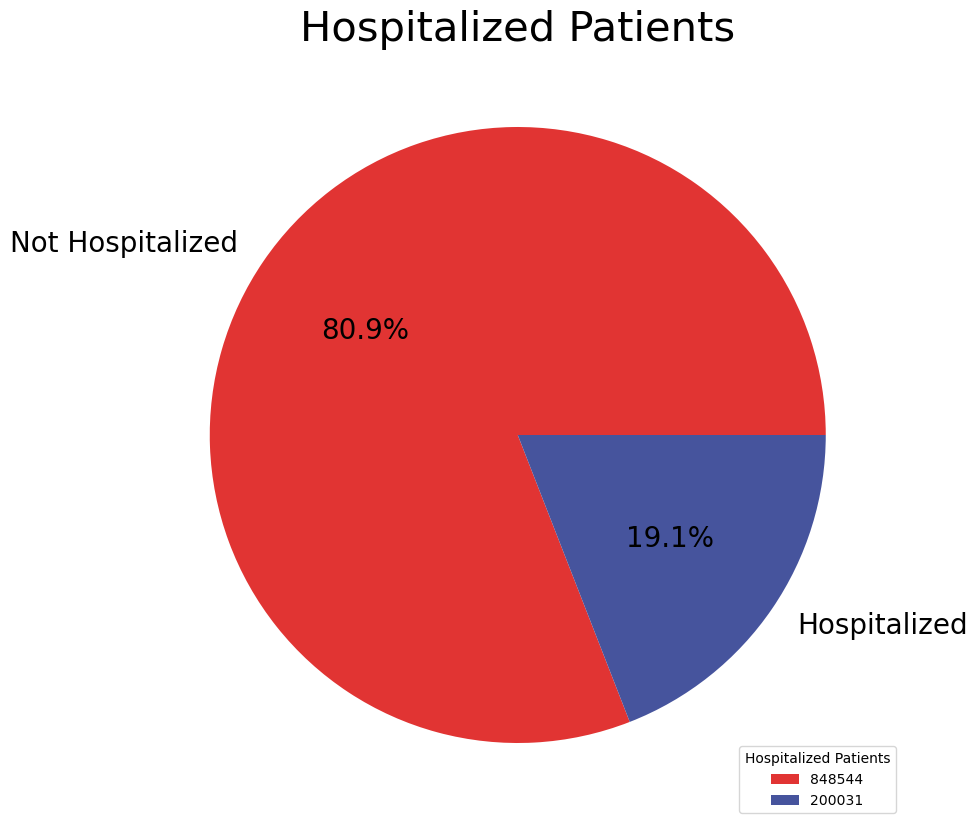

In [84]:
labels = ["Not Hospitalized", "Hospitalized"]
sizes = df['PATIENT_TYPE'].value_counts()
colors = ['#e13433', '#46549d']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.title('Hospitalized Patients',color = 'black',fontsize = 30)
plt.legend(df['PATIENT_TYPE'].value_counts(), loc = 'lower right', title = 'Hospitalized Patients')
plt.show()

In [85]:
df_hosp = df[df['PATIENT_TYPE']==2]

In [86]:
df_hosp['DEAD'] = df_hosp['DEAD'].replace(1, "Dead")
df_hosp['DEAD'] = df_hosp['DEAD'].replace(0, "Alive")

In [87]:
df_hosp['DEAD'].value_counts()

DEAD
Alive    129965
Dead      70066
Name: count, dtype: int64

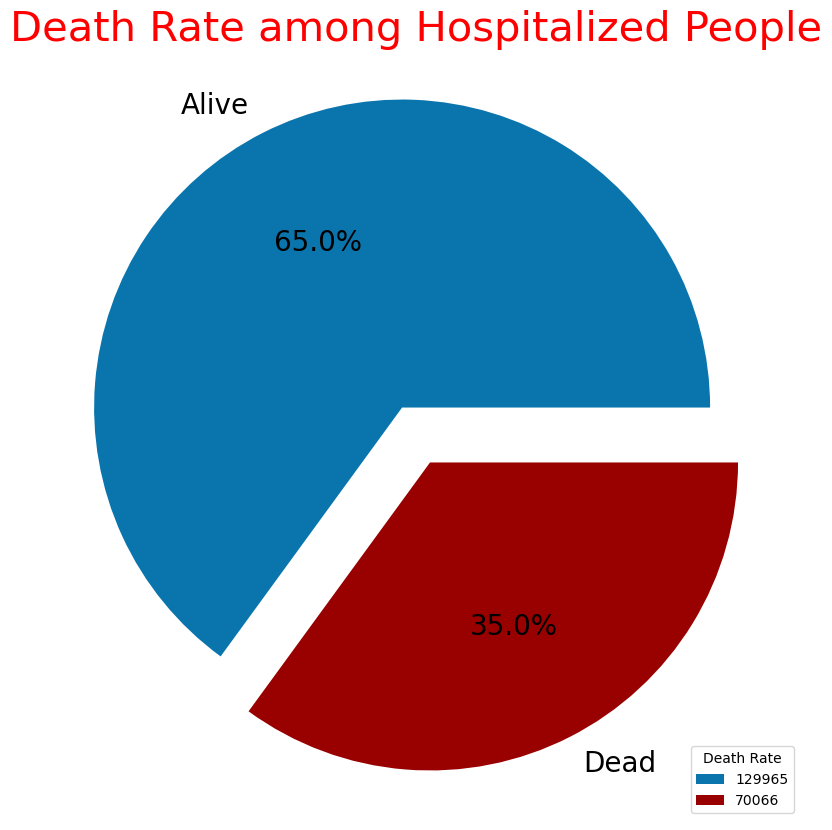

In [88]:
labels = ["Alive", "Dead"]
sizes = df_hosp['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.1, 0.1])
plt.title('Death Rate among Hospitalized People', color = 'red', fontsize = 30)
plt.legend(df_hosp['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

In [89]:
print(df_diseases.shape)
print(df_diseases.columns)

(1048575, 10)
Index(['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'RENAL_CHRONIC', 'TOBACCO'],
      dtype='object')


In [90]:
print(df_hosp.shape)
print(df_hosp.columns)

(200031, 23)
Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD',
       'Covid_or_Not'],
      dtype='object')


In [91]:
df_diseases2 = df_hosp.drop(columns = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
                                      'AGE', "PREGNANT", "OBESITY",'CLASIFFICATION_FINAL', 'ICU', 'DEAD',
                                       'Covid_or_Not'])

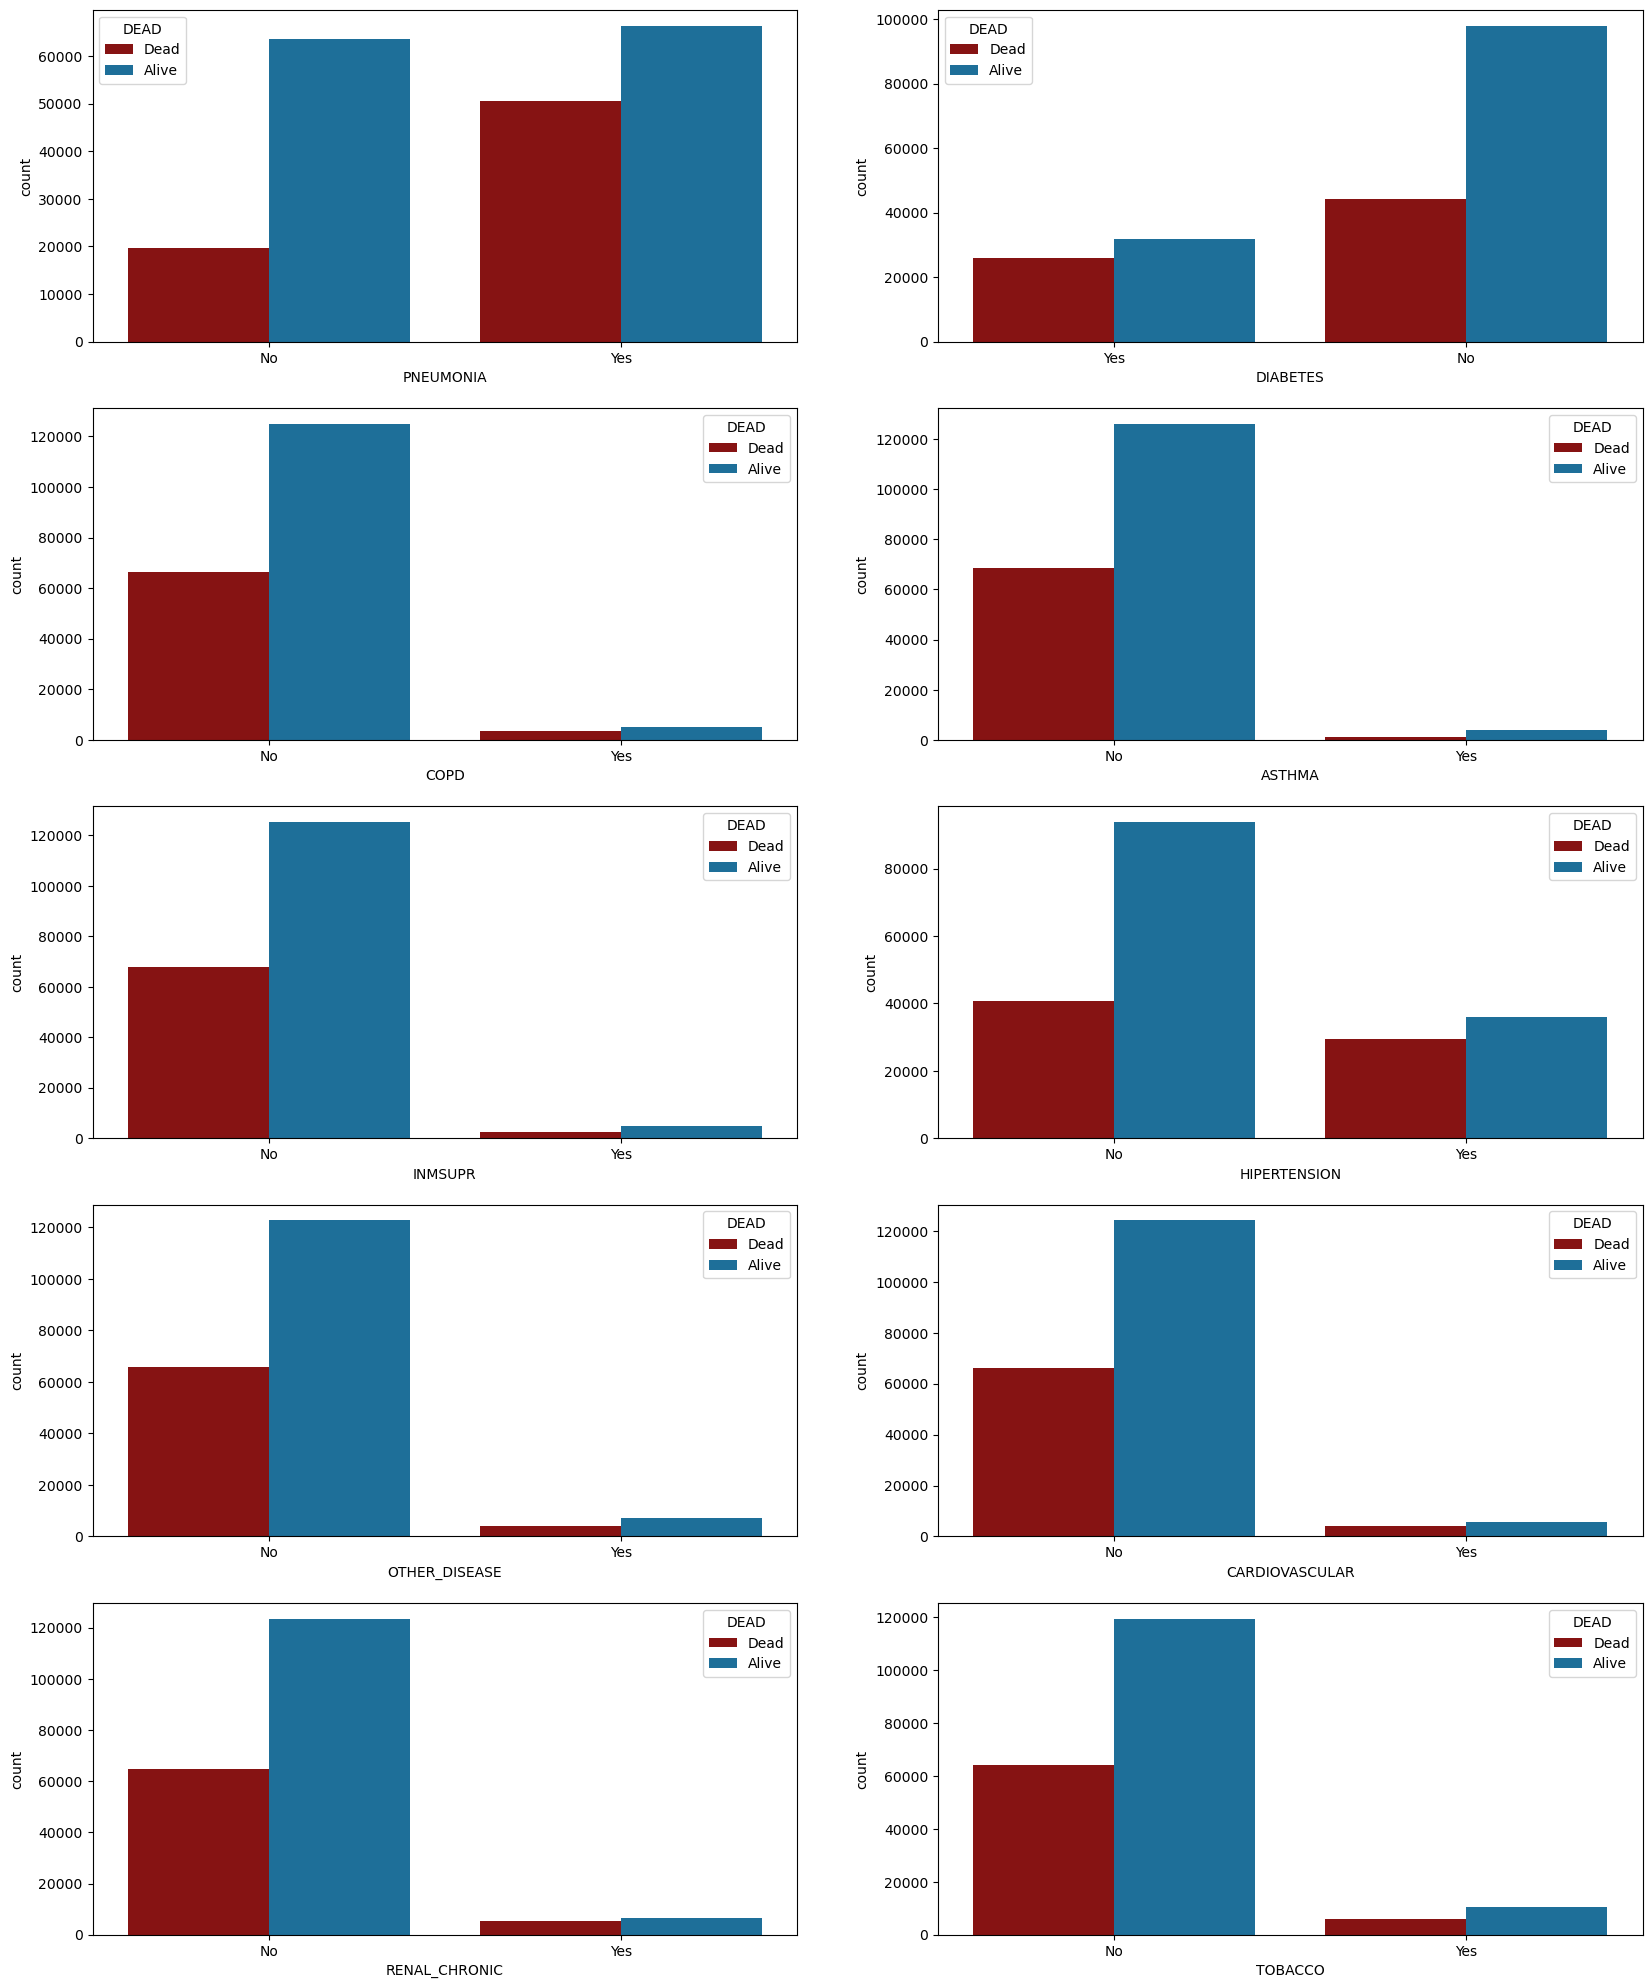

In [92]:
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases2.columns:
    plt.subplot(5, 2, index)
    df_diseases2[i] = ["Yes" if j==1 else "No" for j in df_diseases2[i]]
    sns.countplot(data=df_diseases2, x=i, hue=df_hosp['DEAD'],
                  palette = [ '#990000', '#0a75ad'])
    index += 1
plt.show()

In [93]:
df_dead.PATIENT_TYPE.value_counts()

PATIENT_TYPE
2    70066
1     6876
Name: count, dtype: int64

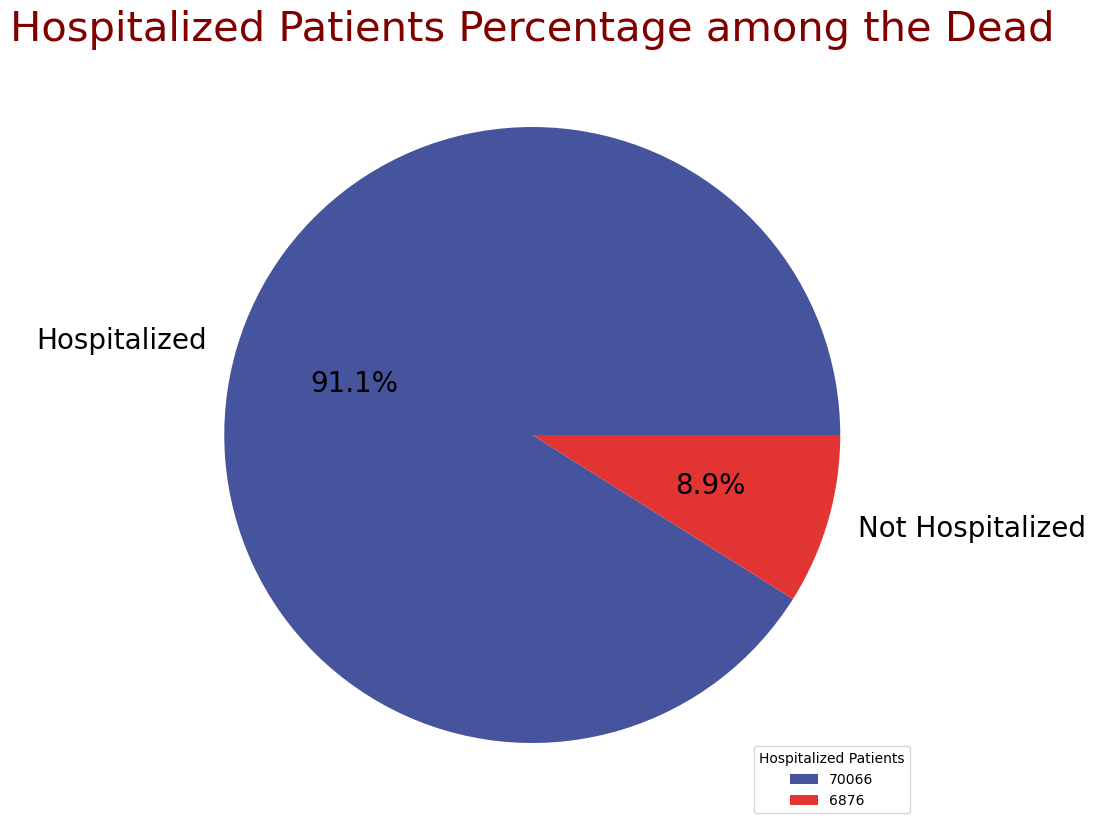

In [94]:
labels = ["Hospitalized", "Not Hospitalized"]
sizes = df_dead.PATIENT_TYPE.value_counts()
colors = ['#46549d', '#e13433']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Hospitalized Patients Percentage among the Dead', color = 'Maroon', fontsize = 30)
plt.legend(df_dead.PATIENT_TYPE.value_counts(), loc = 'lower right', title = 'Hospitalized Patients')
plt.show()

In [95]:
df[(df['PATIENT_TYPE'] == 2) & (df['ICU'] == 1)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_or_Not
16,2,1,1,2,NaT,2.0,1.0,80.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
20,2,1,2,2,NaT,2.0,1.0,59.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,3,1.0,0,A Covid 19 Carrier
41,2,1,2,2,NaT,1.0,1.0,45.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
56,2,1,1,2,NaT,1.0,1.0,58.0,2.0,2.0,...,1.0,2.0,1.0,1.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
57,2,1,1,2,NaT,1.0,1.0,48.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048255,1,13,2,2,NaT,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
1048270,2,13,1,2,NaT,1.0,1.0,22.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
1048358,1,13,1,2,NaT,1.0,2.0,44.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
1048364,1,13,2,2,NaT,1.0,1.0,55.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,1.0,7,1.0,0,Not a Covid 19 Carrier


In [96]:
df.ICU.value_counts()

ICU
2.0    1024229
1.0      16858
Name: count, dtype: int64

In [97]:
df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts()

ICU
2.0    175685
1.0     16858
Name: count, dtype: int64

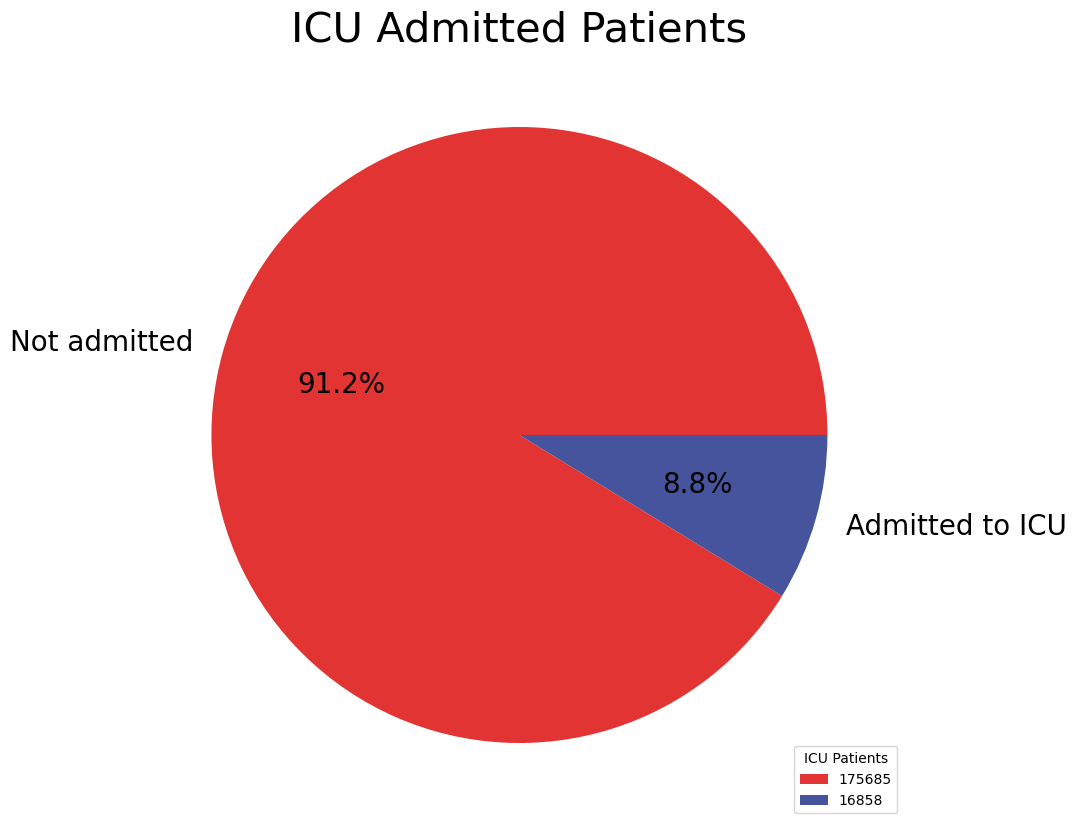

In [98]:
labels = ["Not admitted", "Admitted to ICU"]
sizes = df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts()
colors = [ '#e13433', '#46549d']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.title('ICU Admitted Patients',color = 'black',fontsize = 30)
plt.legend(df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts(), loc = 'lower right',
           title = 'ICU Patients')
plt.show()

In [99]:
df['CLASIFFICATION_FINAL'] = df['CLASIFFICATION_FINAL'].astype(int)
df[(df['CLASIFFICATION_FINAL'] < 4) & (df['ICU'] == 1)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_or_Not
16,2,1,1,2,NaT,2.0,1.0,80.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
20,2,1,2,2,NaT,2.0,1.0,59.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,3,1.0,0,A Covid 19 Carrier
41,2,1,2,2,NaT,1.0,1.0,45.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
340,1,3,2,2,2020-04-06,1.0,1.0,90.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,1,A Covid 19 Carrier
341,1,3,2,2,2020-04-07,1.0,1.0,61.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,3,1.0,1,A Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047735,1,13,2,2,NaT,1.0,1.0,55.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
1047737,1,13,2,2,NaT,2.0,2.0,56.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
1047740,1,13,2,2,NaT,2.0,1.0,68.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
1047750,1,13,2,2,NaT,1.0,2.0,35.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier


In [100]:
16858 - 10449

6409

In [101]:
df[(df['ICU'] == 1)]['CLASIFFICATION_FINAL'].value_counts()

CLASIFFICATION_FINAL
3    10097
7     4951
6      953
5      465
1      255
2       97
4       40
Name: count, dtype: int64

In [102]:
df[(df['ICU'] == 1)]['Covid_or_Not'].value_counts()

Covid_or_Not
A Covid 19 Carrier        10449
Not a Covid 19 Carrier     6409
Name: count, dtype: int64

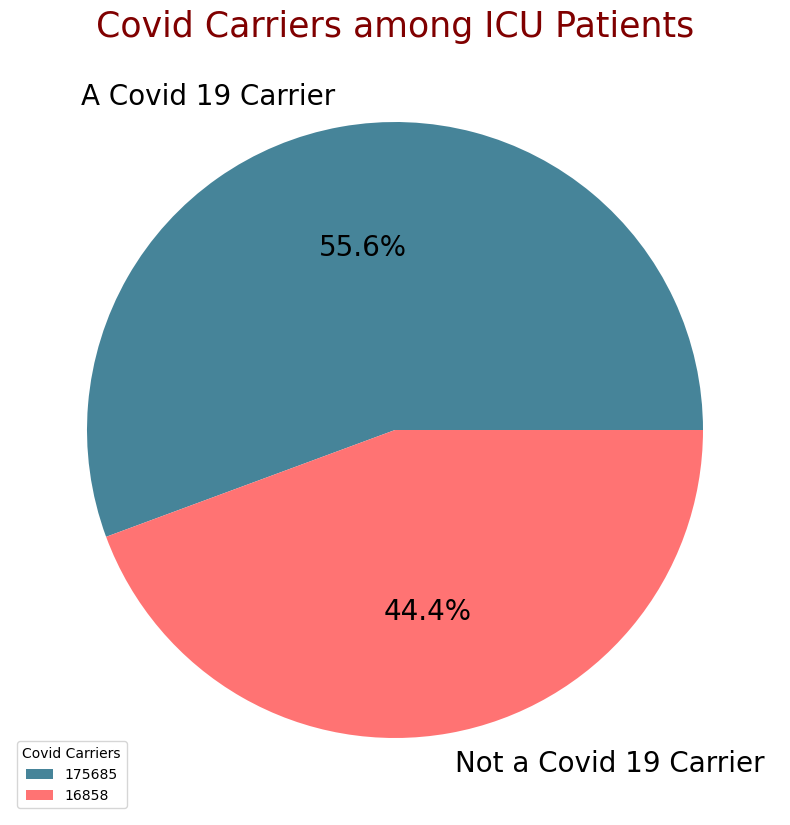

In [103]:
labels = ["A Covid 19 Carrier", "Not a Covid 19 Carrier"]
sizes = df[(df['PATIENT_TYPE'] == 2)]['Covid_or_Not'].value_counts()
colors = ['#468499', '#ff7373']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among ICU Patients', color = 'maroon', fontsize = 25)
plt.show()

In [104]:
df[(df['ICU'] == 1)]['DEAD'].value_counts()

DEAD
0    8663
1    8195
Name: count, dtype: int64

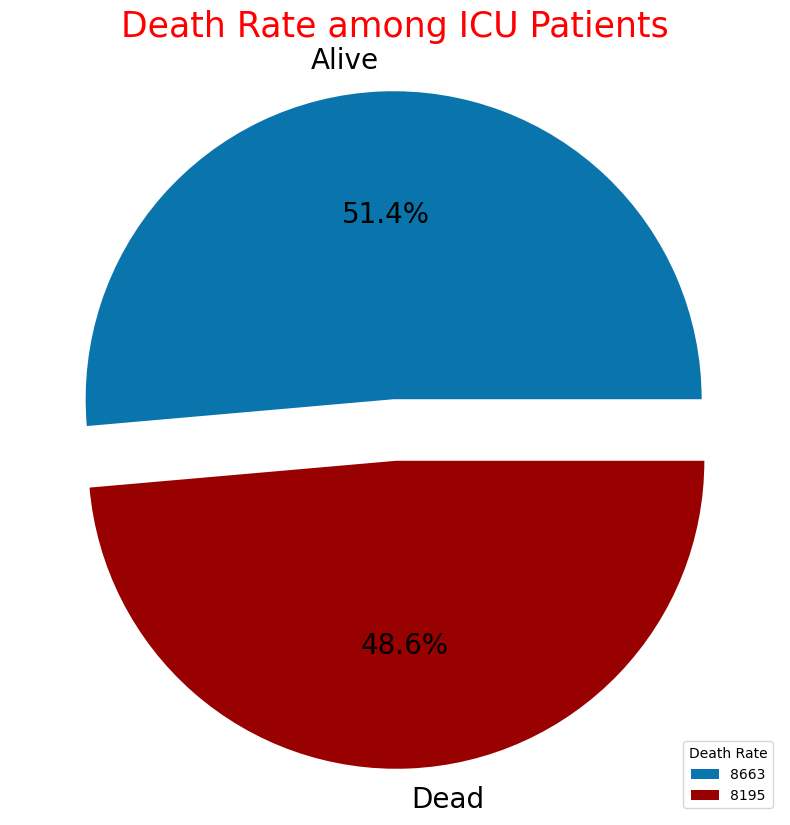

In [105]:
labels = ["Alive", "Dead"]
sizes = df[(df['ICU'] == 1)]['DEAD'].value_counts()
colors = [ '#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.1, 0.1])
plt.title('Death Rate among ICU Patients', color = 'red', fontsize = 25)
plt.legend(df[(df['ICU'] == 1)]['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

In [106]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD',
       'Covid_or_Not'],
      dtype='object')

Text(0.5, 1.0, 'Death Trend through Time')

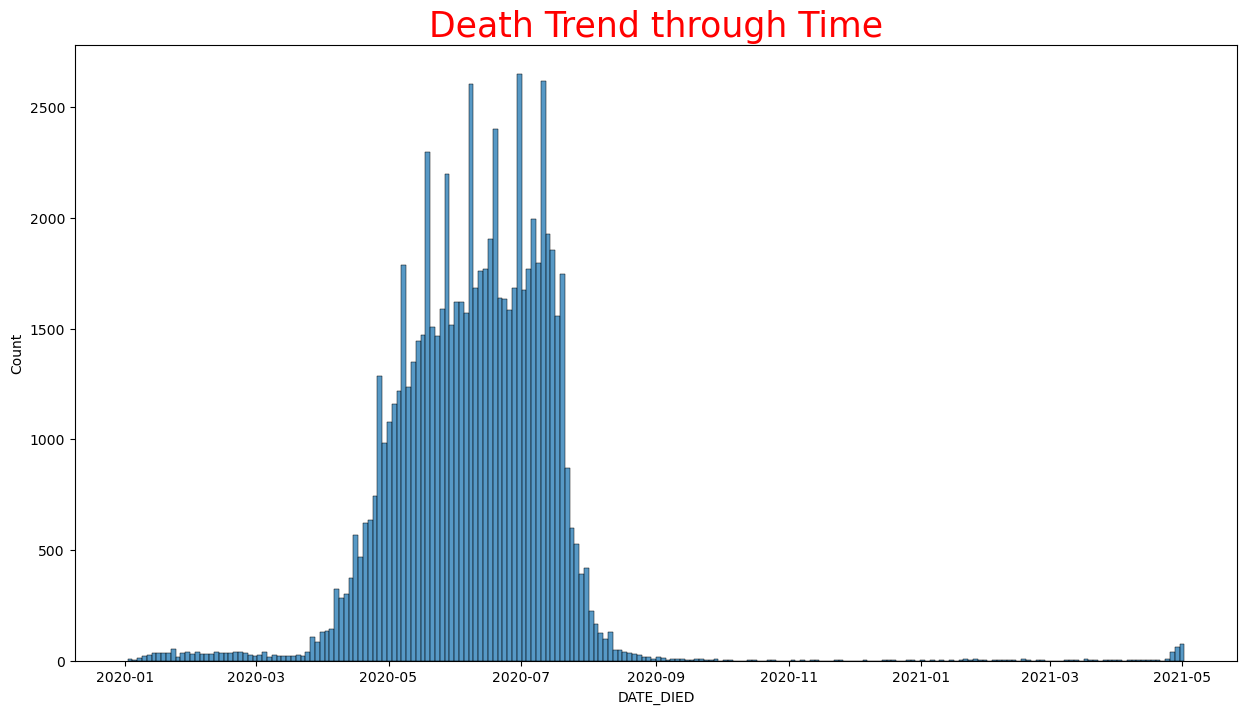

In [107]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x="DATE_DIED")
plt.title('Death Trend through Time', color = 'red', fontsize = 25)

In [108]:
df_model = df.drop(columns=['DATE_DIED','SEX'])

In [109]:
df_model.dropna().shape

(1019473, 21)

In [110]:
df_model.shape

(1048575, 21)

In [111]:
1048575 - 1019473

29102

In [112]:
29102 / 1048575

0.027753856424194742

In [113]:
df_model.dropna(inplace = True)

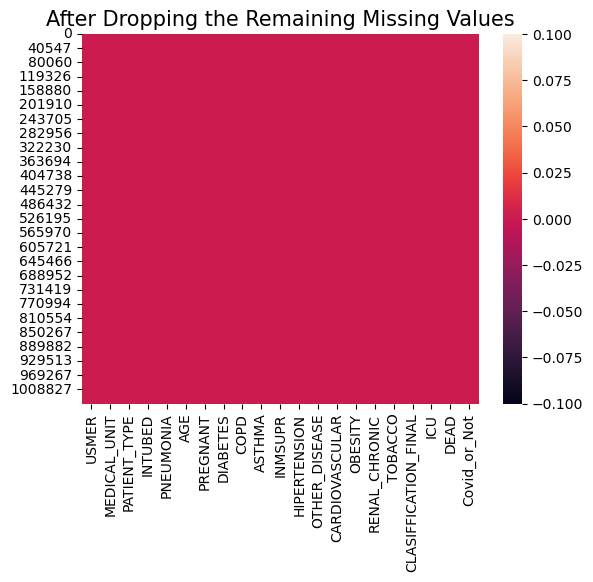

In [114]:
sns.heatmap(df_model.isnull())
plt.title('After Dropping the Remaining Missing Values', color = 'black', fontsize = 15)
plt.show()

In [115]:
df_model.Covid_or_Not.value_counts()

Covid_or_Not
Not a Covid 19 Carrier    633448
A Covid 19 Carrier        386025
Name: count, dtype: int64

In [116]:
df_model.Covid_or_Not = df_model.Covid_or_Not.apply(lambda x: 2 if x=="Not a Covid 19 Carrier" else 1)

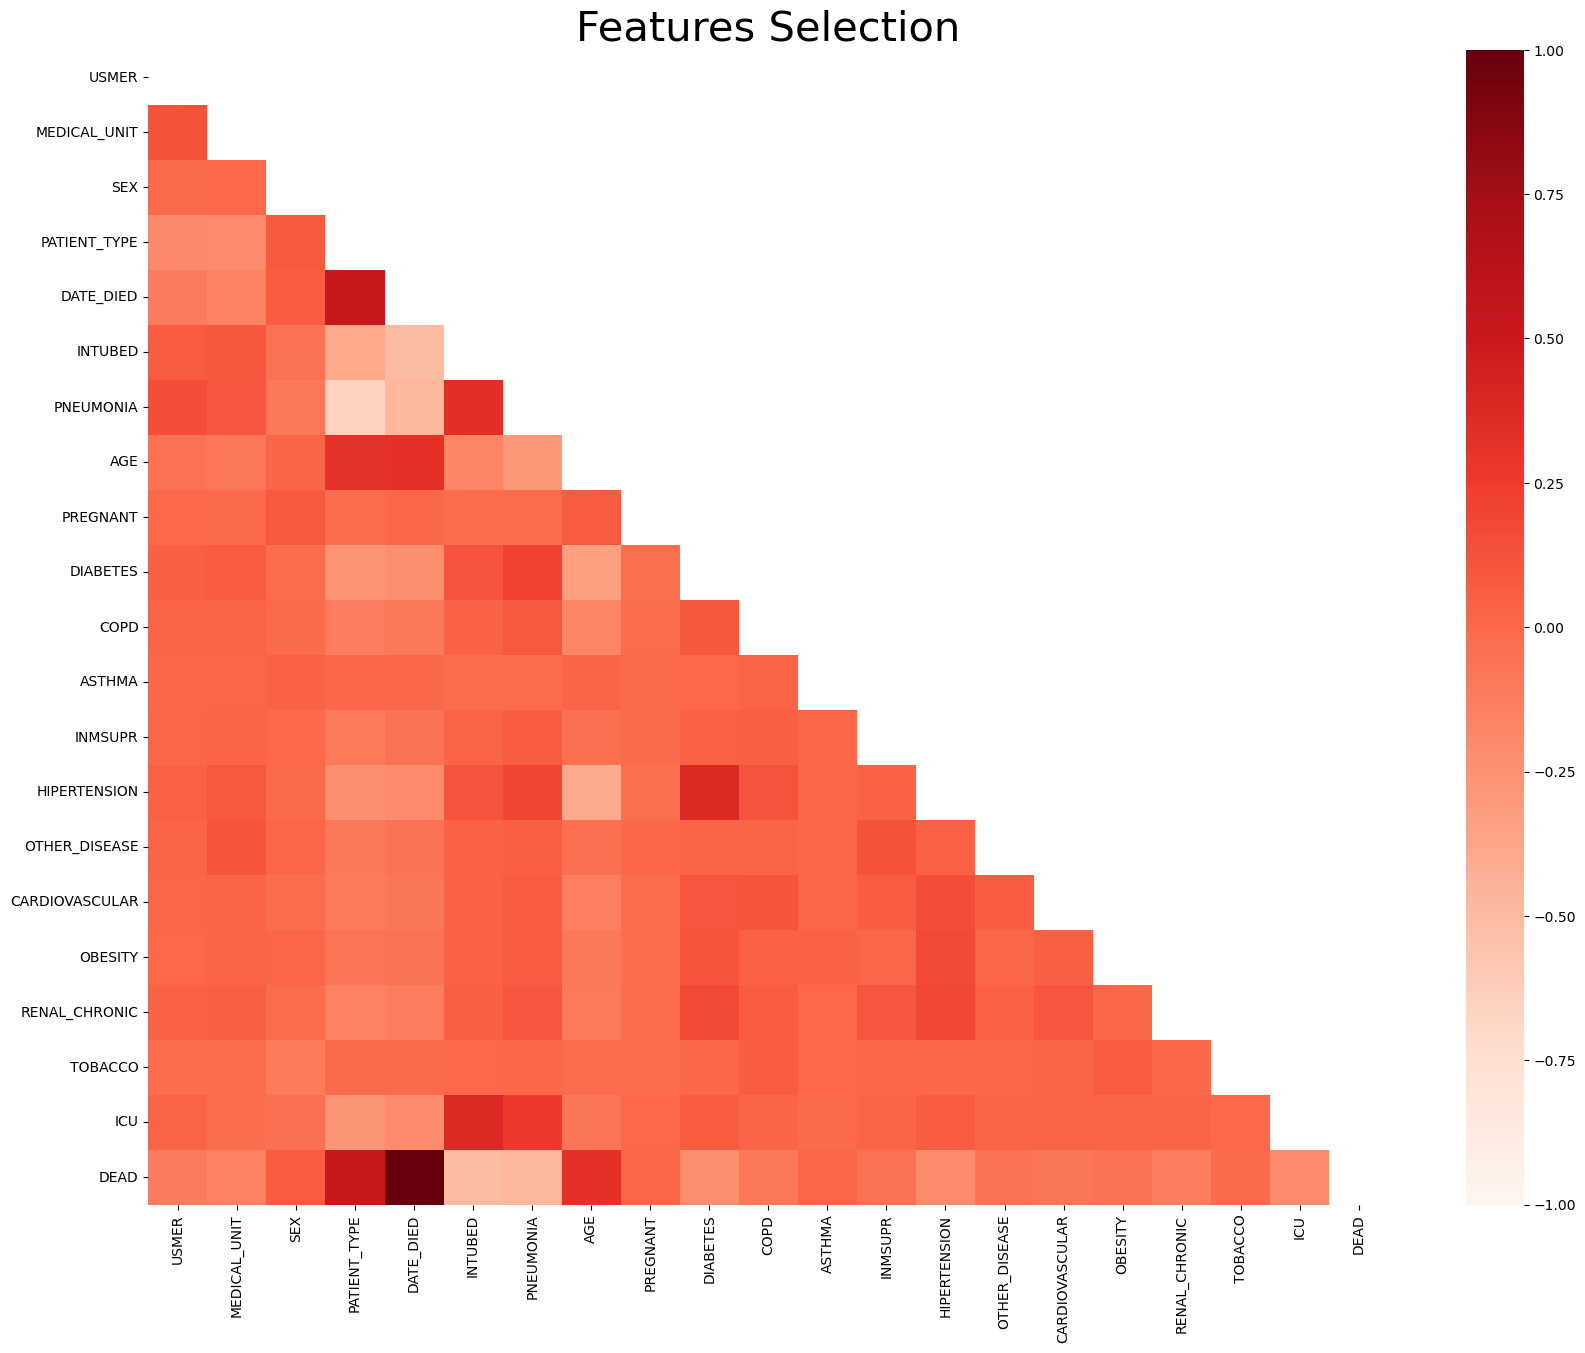

In [117]:
# 'CLASIFFICATION_FINAL' sütununu düşürerek yeni bir veri çerçevesi oluştur
df_numeric = df.drop(columns=['CLASIFFICATION_FINAL'])

# 'df_numeric' veri çerçevesinde hangi sütunların string olduğunu belirleyin
string_columns = df_numeric.select_dtypes(include=['object']).columns

# String sütunları 'df_numeric' veri çerçevesinden çıkarın
df_numeric = df_numeric.drop(columns=string_columns)

# Korelasyon matrisini oluştur
fig, ax = plt.subplots(figsize=(20, 15))
mask = np.triu(np.ones_like(df_numeric.corr()))
sns.heatmap(df_numeric.corr(), annot=True, cmap="Reds", vmin=-1, vmax=1, mask=mask)
plt.title('Features Selection', color='black', fontsize=30)
plt.show()


In [118]:
unrelevant_features = ["PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]
df_model.drop(columns=unrelevant_features,inplace=True)


In [119]:
X = df_model.drop('DEAD' , axis= 1)
Y = df_model['DEAD']

In [120]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [121]:
x_train.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,ICU,Covid_or_Not
304766,2,4,1,2.0,2.0,10.0,2.0,2.0,2.0,7,2.0,2
64146,2,4,1,2.0,2.0,57.0,2.0,2.0,2.0,3,2.0,1
1048272,1,13,2,2.0,2.0,1.0,2.0,2.0,2.0,7,2.0,2
43133,1,4,2,1.0,1.0,71.0,2.0,1.0,2.0,3,2.0,1
257909,2,4,1,2.0,2.0,19.0,2.0,2.0,2.0,7,2.0,2


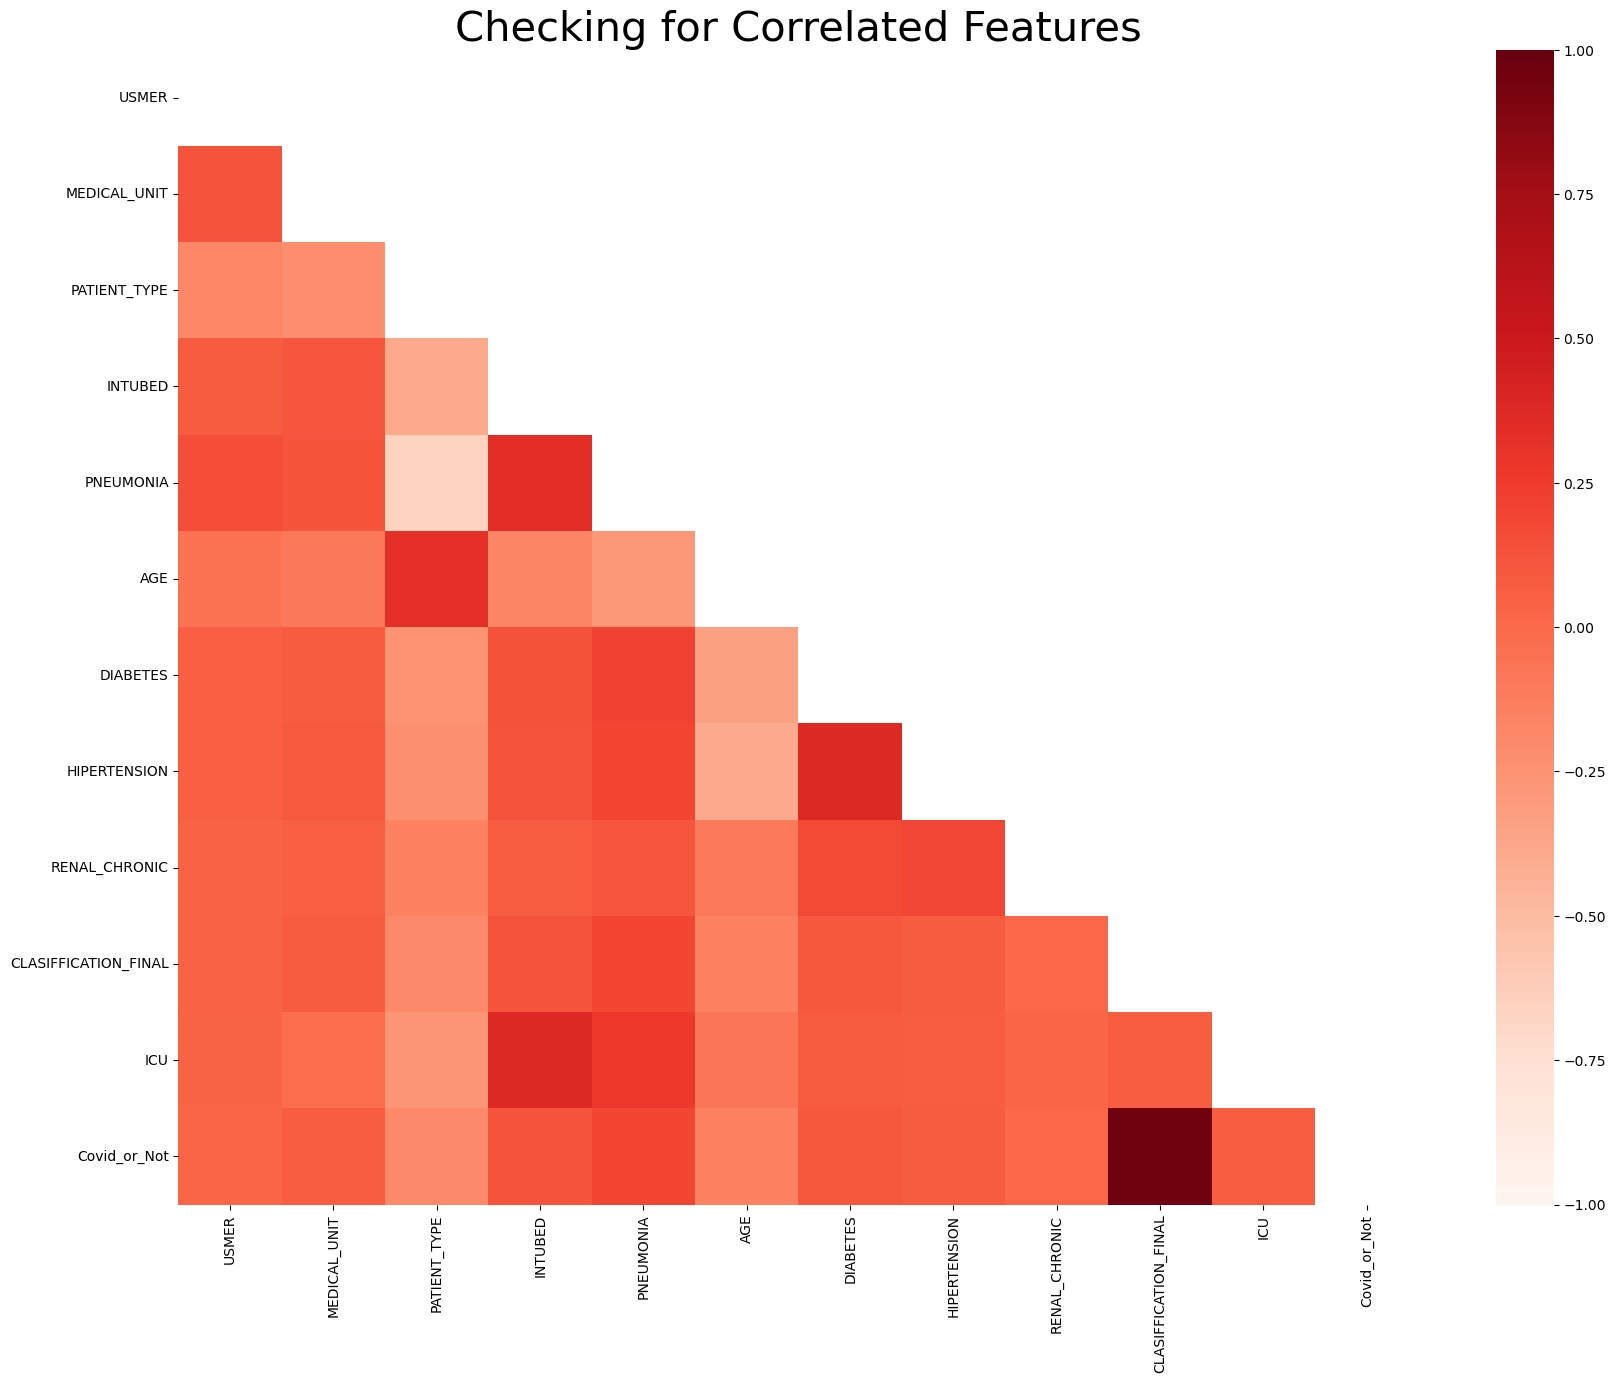

In [122]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(x_train.corr()))
sns.heatmap(x_train.corr(), annot = True, cmap = "Reds", vmin = -1, vmax = 1, mask = mask)
plt.title('Checking for Correlated Features', color = 'black', fontsize = 30)
plt.show()

In [123]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [124]:
print(correlation(x_train, 0.7))

{'Covid_or_Not'}


In [125]:
x_train.drop('Covid_or_Not',axis=1, inplace = True)
x_test.drop('Covid_or_Not',axis=1, inplace = True)

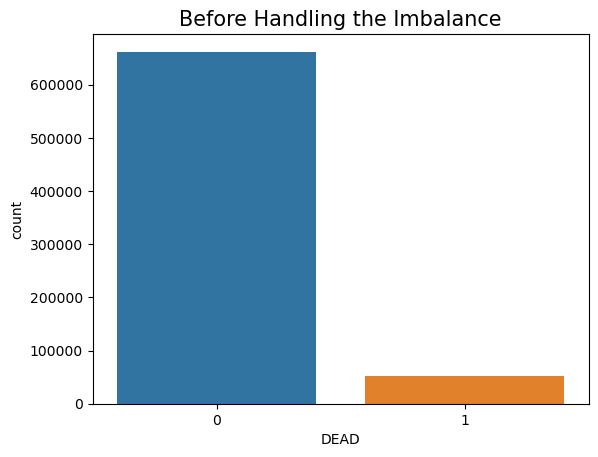

In [126]:
sns.countplot(x = y_train)
plt.title('Before Handling the Imbalance', color = 'black', fontsize = 15)
plt.show()

In [127]:
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

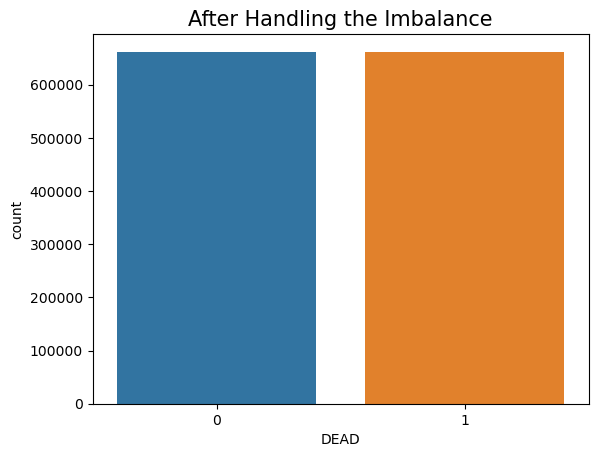

In [128]:
# Let's check our data again:
sns.countplot(x = y_train)
plt.title('After Handling the Imbalance', color = 'black', fontsize = 15)
plt.show()

In [129]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Logistic Regression Train Accuracy: ", lr.score(x_train,y_train), "\n")
print("Logistic Regression Test Accuracy: ", lr.score(x_test,y_test))

Logistic Regression Train Accuracy:  0.9056477251274306 

Logistic Regression Test Accuracy:  0.8995069349533419


In [130]:
Classes = ['Not Dead', 'Dead']
print("Logistic Regression Classification Report:", "\n", classification_report(y_test, lr.predict(x_test), target_names = Classes))

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.99      0.90      0.94    284090
        Dead       0.41      0.91      0.56     21752

    accuracy                           0.90    305842
   macro avg       0.70      0.91      0.75    305842
weighted avg       0.95      0.90      0.92    305842



In [131]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
print("Decision Tree Train Accuracy: ", dt.score(x_train,y_train), "\n")
print("Decision Tree Test Accuracy: ", dt.score(x_test,y_test))

Decision Tree Train Accuracy:  0.9527173872003021 

Decision Tree Test Accuracy:  0.9157604253176477


In [132]:
print("Decision Tree Classification Report:", "\n",classification_report(y_test, dt.predict(x_test), target_names = Classes))

Decision Tree Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.98      0.93      0.95    284090
        Dead       0.45      0.77      0.57     21752

    accuracy                           0.92    305842
   macro avg       0.71      0.85      0.76    305842
weighted avg       0.94      0.92      0.93    305842



In [133]:
rf=RandomForestClassifier(n_estimators=4,random_state=42)
rf.fit(x_train,y_train)
print("Random Forest Train Accuracy: ", rf.score(x_train,y_train), "\n")
print("Random Forest Forest Test Accuracy: ", rf.score(x_test,y_test))

Random Forest Train Accuracy:  0.9516624504436474 

Random Forest Forest Test Accuracy:  0.9155053916728245


In [134]:
print("Random Forest Classification Report:", "\n",classification_report(y_test, rf.predict(x_test), target_names = Classes))

Random Forest Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.98      0.93      0.95    284090
        Dead       0.45      0.78      0.57     21752

    accuracy                           0.92    305842
   macro avg       0.71      0.85      0.76    305842
weighted avg       0.94      0.92      0.93    305842



In [135]:
gnb = GaussianNB()
gnb.fit(x_train , y_train)
print("Naive Bayes Train Accuracy: ", gnb.score(x_train,y_train), "\n")
print("Naive Bayes Test Accuracy: ", gnb.score(x_test,y_test))

Naive Bayes Train Accuracy:  0.878634698886162 

Naive Bayes Test Accuracy:  0.9031754958442595


In [136]:
print("Naive Bayes Classification Report:", "\n",classification_report(y_test, gnb.predict(x_test), target_names = Classes))

Naive Bayes Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.99      0.91      0.95    284090
        Dead       0.41      0.86      0.56     21752

    accuracy                           0.90    305842
   macro avg       0.70      0.88      0.75    305842
weighted avg       0.95      0.90      0.92    305842



In [137]:
XGB = XGBClassifier()
XGB.fit(x_train , y_train)
print("XGBoost Train Accuracy: ", XGB.score(x_train,y_train), "\n")
print("XGBoost Test Accuracy: ", XGB.score(x_test,y_test))

XGBoost Train Accuracy:  0.9344670568246177 

XGBoost Test Accuracy:  0.9071971802433937


In [138]:
print("XGBoost Classification Report:", "\n",classification_report(y_test, XGB.predict(x_test), target_names = Classes))

XGBoost Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.99      0.91      0.95    284090
        Dead       0.43      0.90      0.58     21752

    accuracy                           0.91    305842
   macro avg       0.71      0.91      0.76    305842
weighted avg       0.95      0.91      0.92    305842



In [139]:
# KNN modelini oluştur
knn = KNeighborsClassifier(n_neighbors=6)

# Modeli eğit
knn.fit(x_train, y_train)

# Eğitim ve test doğruluğunu yazdır
print("KNN Train Accuracy: ", knn.score(x_train, y_train))
print("KNN Test Accuracy: ", knn.score(x_test, y_test))

# Sınıflandırma raporunu yazdır
Classes = ['Not Dead', 'Dead']
print("KNN Classification Report:", "\n", classification_report(y_test, knn.predict(x_test), target_names=Classes))

KNN Train Accuracy:  0.8320800453086653
KNN Test Accuracy:  0.9402894304902532
KNN Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.96      0.97      0.97    284090
        Dead       0.59      0.53      0.56     21752

    accuracy                           0.94    305842
   macro avg       0.78      0.75      0.76    305842
weighted avg       0.94      0.94      0.94    305842



In [140]:
# Modeli oluştur
ann = Sequential()
ann.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))
ann.add(Dense(units=32, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

# Modeli derle
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğit
ann.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Eğitim ve test doğruluğunu yazdır
train_loss, train_accuracy = ann.evaluate(x_train, y_train)
test_loss, test_accuracy = ann.evaluate(x_test, y_test)
print("ANN Train Accuracy: ", train_accuracy)
print("ANN Test Accuracy: ", test_accuracy)

# Sınıflandırma raporunu yazdır
y_pred = (ann.predict(x_test) > 0.5).astype("int32")
Classes = ['Not Dead', 'Dead']
print("ANN Classification Report:", "\n", classification_report(y_test, y_pred, target_names=Classes))

Epoch 1/10


2024-06-02 18:53:51.066993: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


33107/33107 [==============================] - 17s 514us/step - loss: 0.2395 - accuracy: 0.9030 - val_loss: 0.2988 - val_accuracy: 0.9177
Epoch 2/10
33107/33107 [==============================] - 19s 562us/step - loss: 0.2290 - accuracy: 0.9077 - val_loss: 0.3610 - val_accuracy: 0.8937
Epoch 3/10
33107/33107 [==============================] - 18s 548us/step - loss: 0.2266 - accuracy: 0.9087 - val_loss: 0.2721 - val_accuracy: 0.9245
Epoch 4/10
33107/33107 [==============================] - 18s 551us/step - loss: 0.2248 - accuracy: 0.9091 - val_loss: 0.2537 - val_accuracy: 0.9274
Epoch 5/10
33107/33107 [==============================] - 20s 601us/step - loss: 0.2229 - accuracy: 0.9100 - val_loss: 0.3297 - val_accuracy: 0.8967
Epoch 6/10
33107/33107 [==============================] - 21s 626us/step - loss: 0.2214 - accuracy: 0.9104 - val_loss: 0.2732 - val_accuracy: 0.9228
Epoch 7/10
33107/33107 [==============================] - 22s 669us/step - loss: 0.2204 - accuracy: 0.9108 - val_loss

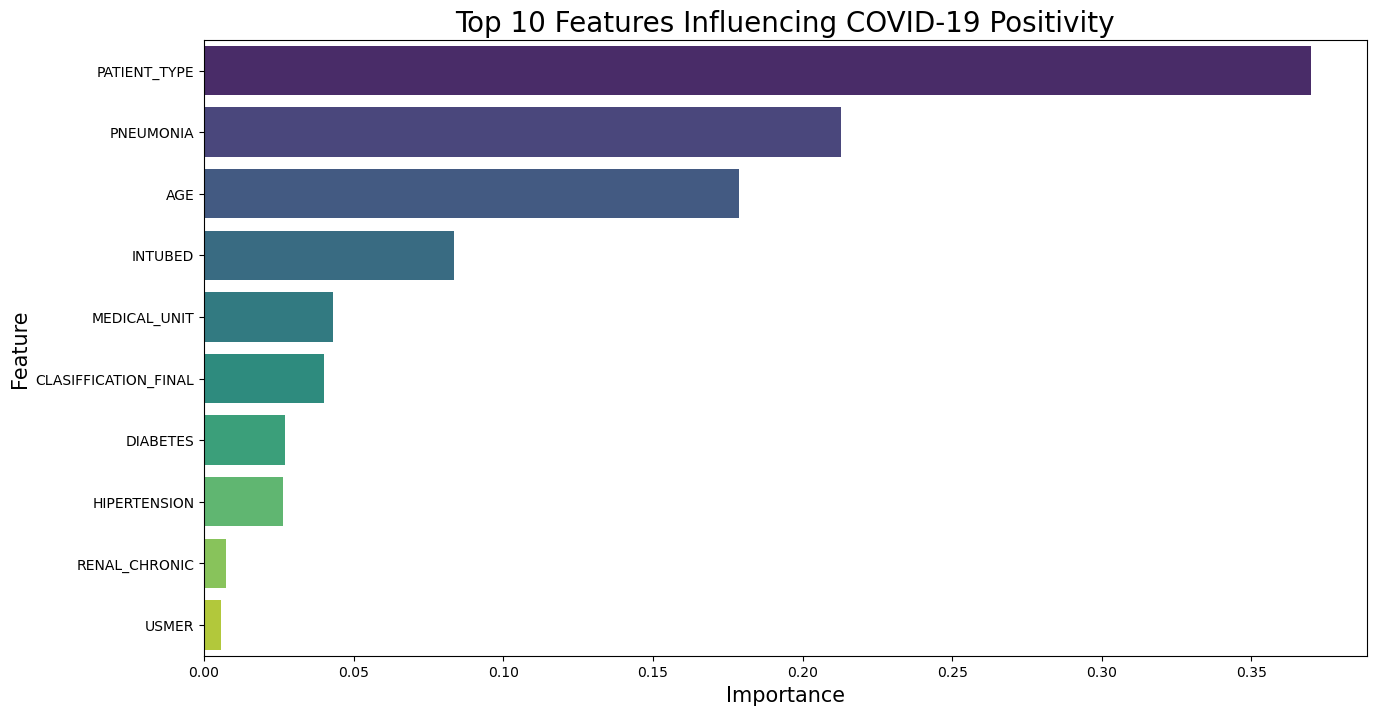

In [141]:
# Random Forest Classifier'ı oluştur
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğit
rf.fit(x_train, y_train)

# Özelliklerin önem derecelerini al
feature_importance = rf.feature_importances_

# Özelliklerin isimlerini al
feature_names = x_train.columns

# Özelliklerin önem derecelerini ve isimlerini eşleştir
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Özelliklerin önem derecelerine göre sırala
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Önemli olan en üst 10 özelliği görselleştir
plt.figure(figsize=(15, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Features Influencing COVID-19 Positivity', fontsize=20)
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.show()


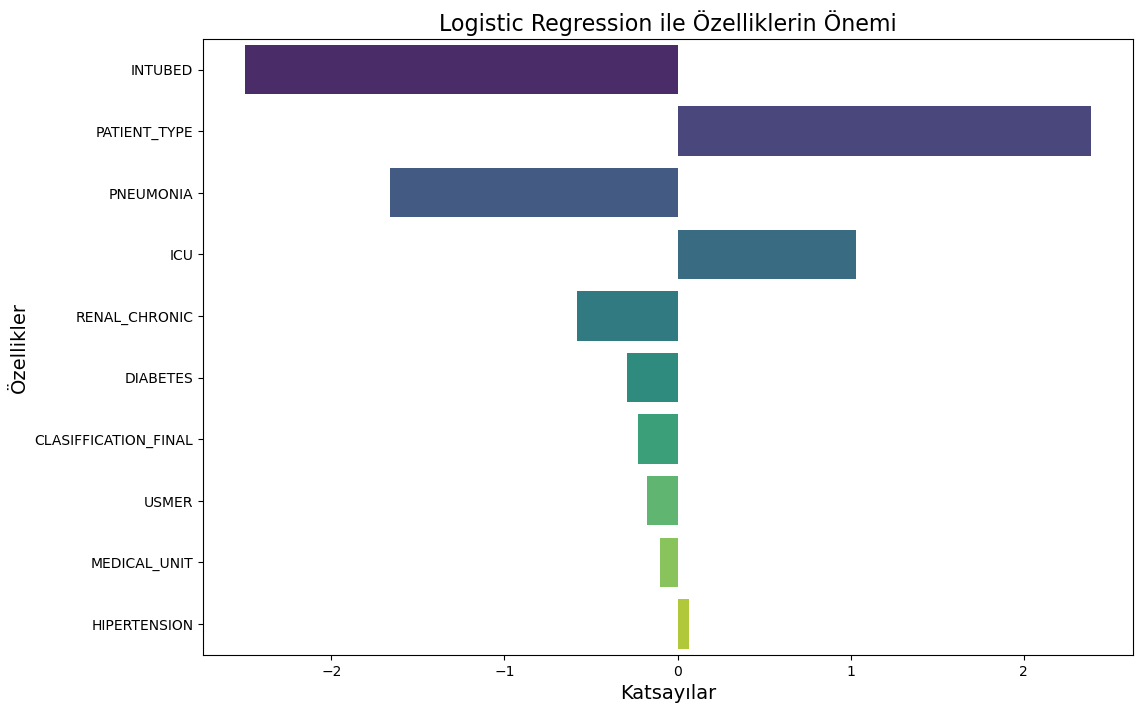

In [142]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression modelini oluştur
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Özelliklerin katsayılarını ve isimlerini al
feature_coefficients = lr.coef_[0]
feature_names = x_train.columns

# Özellik katsayılarını ve isimlerini birleştir
feature_coefficient_names = list(zip(feature_names, feature_coefficients))

# Özellik katsayılarını sırala
sorted_coefficients = sorted(feature_coefficient_names, key=lambda x: abs(x[1]), reverse=True)

# En önemli 10 özelliği seç
top_features = sorted_coefficients[:10]

# Görselleştirme için özellik adlarını ve katsayılarını ayrı listelere ayır
feature_names, coefficients = zip(*top_features)

# Görselleştir
plt.figure(figsize=(12, 8))
sns.barplot(x=list(coefficients), y=list(feature_names), palette='viridis')
plt.xlabel('Katsayılar', fontsize=14)
plt.ylabel('Özellikler', fontsize=14)
plt.title('Logistic Regression ile Özelliklerin Önemi', fontsize=16)
plt.show()


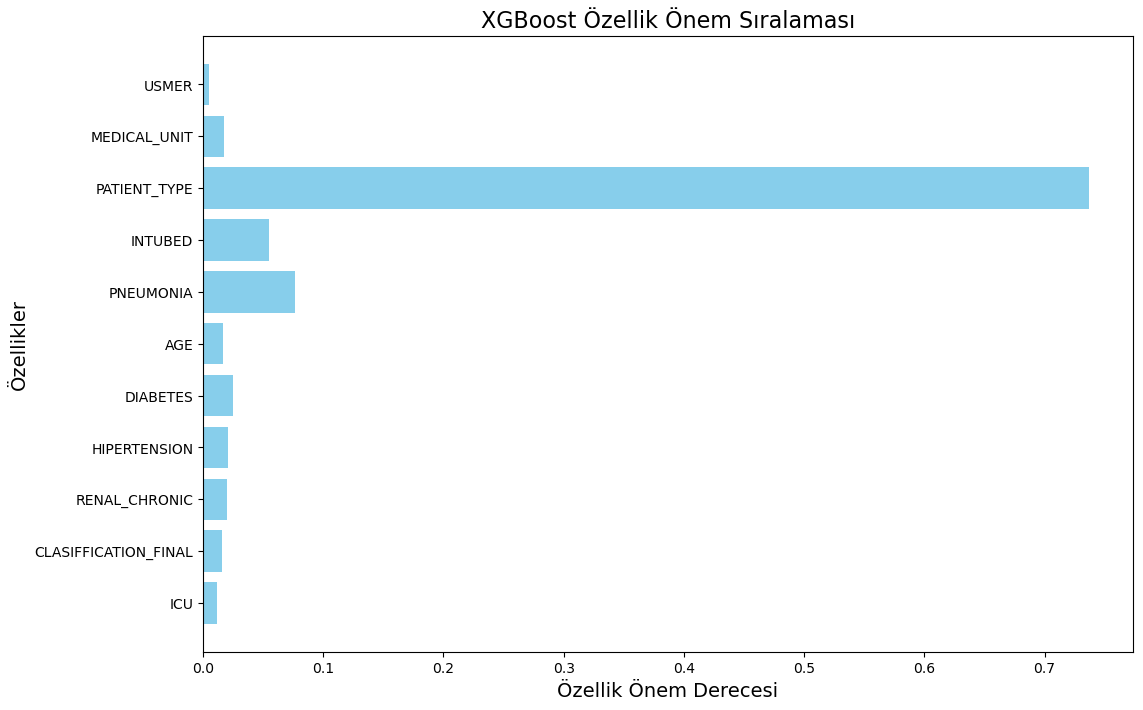

In [143]:
import xgboost as xgb
import matplotlib.pyplot as plt

# XGBoost modelini eğitin (X_train ve y_train verileri kullanılarak)
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

# Özellik önem sıralamasını alın
importance = xgb_model.feature_importances_
feature_names = x_train.columns

# Özellik önem sıralamasını görselleştir
plt.figure(figsize=(12, 8))
plt.barh(feature_names, importance, color='skyblue')
plt.xlabel('Özellik Önem Derecesi', fontsize=14)
plt.ylabel('Özellikler', fontsize=14)
plt.title('XGBoost Özellik Önem Sıralaması', fontsize=16)
plt.gca().invert_yaxis()
plt.show()


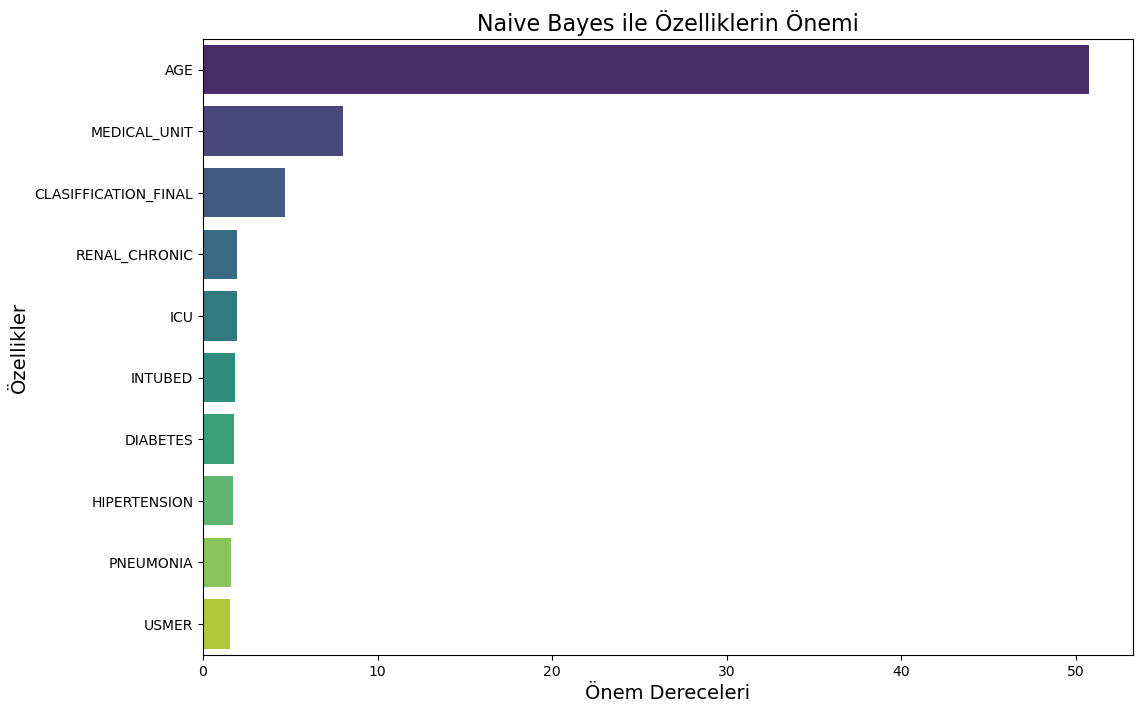

In [144]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Naive Bayes modelini oluştur ve eğit
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

# Özelliklerin log-olasılıklarını al
feature_log_probs = nb_model.theta_
feature_names = x_train.columns

# Özellik log-olasılıklarının mutlak değerlerini alarak önem derecelerini belirle
importance = np.abs(feature_log_probs).mean(axis=0)

# Özellikleri önem derecelerine göre sırala
sorted_indices = np.argsort(importance)[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_importance = importance[sorted_indices]

# En önemli 10 özelliği seç
top_features = sorted_feature_names[:10]
top_importance = sorted_importance[:10]

# Görselleştir
plt.figure(figsize=(12, 8))
sns.barplot(x=top_importance, y=top_features, palette='viridis')
plt.xlabel('Önem Dereceleri', fontsize=14)
plt.ylabel('Özellikler', fontsize=14)
plt.title('Naive Bayes ile Özelliklerin Önemi', fontsize=16)
plt.show()
